#  Annotation

## Settings 

In [1]:
# Path related settings (these should be the same as for the previous notebook)
output_dir = '/mnt/workspace/jdetlef/processed_data'
test = 'Stomach_95'

# Gene annotation
GTF_PATH = "/mnt/workspace/jdetlef/data/genome/gencode.v39.annotation_sorted.gtf"
# Cell type annotation
PANGLAO_DB_PATH = "/mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers"

## Loading packages and setup

In [2]:
import sctoolbox.atac_tree as sub_tree
import sctoolbox.annotation as annot
import sctoolbox.custom_celltype_annotation as ctannot
import episcanpy as epi
import scanpy as sc
from matplotlib import pyplot as plt
from pybiomart import Dataset

## Setup path handling object 

In [3]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

all directories existing
all directories existing


In [4]:
tree.gtf_path = GTF_PATH

## Load anndata

In [5]:
clustering_output = tree.clustering_anndata
adata = epi.read_h5ad(clustering_output)
adata

AnnData object with n_obs × n_vars = 9258 × 82859
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'n_features_by_counts', 'log1p_n_features_by_counts', 'total_counts', 'log1p_total_counts', 'insertsize_count', 'mean_insertsize', 'nb_features', 'log_nb_features', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering'
    var: 'peak_chr', 'peak_start', 'peak_end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'highly_variable'
    uns: 'clustering_colors', 'color_set', 'infoprocess', 'insertsize_distribution', 'legend', 'leiden', 'leiden_0.1_colors', 'leiden_0.2_colors', 'leiden_0.3_colors', 'leiden_0.4_colors', 'leiden_0.5_colors', 'leiden_0.6_colors', 'leiden_0.7_colors', 'leiden_0.8_colors', 'leiden_0.9_colors', 'log1p', 'neighbors', 'pca', 'sample_colors

## Gene annotation 

In [6]:
annot.annotate_adata(adata,
                   GTF_PATH,
                   config=None,
                   best=True,
                   threads=6,
                   coordinate_cols=None,
                   temp_dir="",
                   verbose=True,
                   inplace=True)

Setting up annotation configuration...
Config dictionary: {'queries': [{'distance': [10000, 1000], 'feature_anchor': ['start'], 'feature': ['gene'], 'name': 'promoters'}], 'priority': True, 'show_attributes': ['all'], 'output_by_query': False}
Setting up genomic regions to annotate...
The regions in adata.var are not in the correct format. Trying to format the index.
formatting adata.var index to coordinate columns:
Preparing gtf file for annotation...
- Reading gtf with Tabix
- Index of gtf not found - trying to index gtf
- Reading gtf with Tabix
Done preparing gtf!
Annotating regions...
Formatting annotations...
Finished annotation of features! The results are found in the .var table.
[Errno 2] No such file or directory: ''


In [7]:
adata.var['gene_name']

b'chr1':10001-10595           DDX11L1
b'chr1':180710-181006        DDX11L17
b'chr1':181437-181983        DDX11L17
b'chr1':629113-630044        MTND2P28
b'chr1':630234-630475        MTND2P28
                               ...   
b'chrY':56850314-56850503     CTBP2P1
b'chrY':56850718-56850995     CTBP2P1
b'chrY':56851081-56851218     CTBP2P1
b'chrY':56870928-56871089         NaN
b'chrY':56873571-56873803         NaN
Name: gene_name, Length: 82859, dtype: category
Categories (22540, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYX', 'ZZEF1', 'ZZZ3', 'hsa-mir-423']

In [8]:
assigned_features = adata.var['gene_name'].dropna()
assigned_features

b'chr1':10001-10595           DDX11L1
b'chr1':180710-181006        DDX11L17
b'chr1':181437-181983        DDX11L17
b'chr1':629113-630044        MTND2P28
b'chr1':630234-630475        MTND2P28
                               ...   
b'chrY':56847144-56847231     CTBP2P1
b'chrY':56847737-56847882     CTBP2P1
b'chrY':56850314-56850503     CTBP2P1
b'chrY':56850718-56850995     CTBP2P1
b'chrY':56851081-56851218     CTBP2P1
Name: gene_name, Length: 37234, dtype: category
Categories (22540, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYX', 'ZZEF1', 'ZZZ3', 'hsa-mir-423']

In [9]:
dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

df = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])

In [10]:
ens_dict = dict(zip(df['Gene stable ID'], df['Gene name']))

In [11]:
count = 0
for index, gene in enumerate(assigned_features):
    if gene.startswith("ENSG"):
        if gene in ens_dict.keys():
            if isinstance(ens_dict[gene], str):
                assigned_features.replace(gene, ens_dict[gene], inplace=True)
                count += 1
print(f'{count} ensembl gene ids have been replaced with gene names')

514 ensembl gene ids have been replaced with gene names


In [12]:
assigned_features

b'chr1':10001-10595           DDX11L1
b'chr1':180710-181006        DDX11L17
b'chr1':181437-181983        DDX11L17
b'chr1':629113-630044        MTND2P28
b'chr1':630234-630475        MTND2P28
                               ...   
b'chrY':56847144-56847231     CTBP2P1
b'chrY':56847737-56847882     CTBP2P1
b'chrY':56850314-56850503     CTBP2P1
b'chrY':56850718-56850995     CTBP2P1
b'chrY':56851081-56851218     CTBP2P1
Name: gene_name, Length: 37234, dtype: category
Categories (22539, object): ['5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG-AS1', ..., 'ZYX', 'ZZEF1', 'ZZZ3', 'hsa-mir-423']

In [13]:
assigned_adata = adata[:, assigned_features.index]
assigned_adata

View of AnnData object with n_obs × n_vars = 9258 × 37234
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'n_features_by_counts', 'log1p_n_features_by_counts', 'total_counts', 'log1p_total_counts', 'insertsize_count', 'mean_insertsize', 'nb_features', 'log_nb_features', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering'
    var: 'peak_chr', 'peak_start', 'peak_end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score', 'highly_variable', 'annotation_feature', 'gene_strand', 'gene_start', 'gene_end', 'annotation_query', 'query_name', 'distance_to_gene', 'gene_anchor', 'gene_ovl_peak', 'peak_ovl_gene', 'relative_location_to_gene', 'gene_id', 'gene_type', 'gene_name', 'level', 'hgnc_id', 'havana_gene', 'tag'
    uns: 'clustering_colors', 'color_set', 'infoprocess

In [14]:
peaks_adata = assigned_adata.copy()

## Rank peaks

In [15]:
adata.obs['clustering']


barcode
AACGAGAGCTAAACCTAAGTGG    3
AACGAGAGCTAACCACCTAAAG    3
AACGAGAGCTAACCGAATTCTC    3
AACGAGAGCTAAGCTAACGCAC    1
AACGAGAGCTAATATAGGTCCG    1
                         ..
TTTGGCGCTTTTGACAAGTCCT    1
TTTGGCGCTTTTGTTCCTCTGC    1
TTTGGCGCTTTTTAACGCCTCT    1
TTTGGCGCTTTTTCCACGCAGT    1
TTTGGCGCTTTTTCTGGCGCAG    3
Name: clustering, Length: 9258, dtype: category
Categories (5, object): ['1', '2', '3', '4', '5']

In [16]:
adata.uns

OverloadedDict, wrapping:
	{'clustering_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
      dtype=object), 'color_set': array(['red', 'blue', 'green', 'pink', 'chartreuse', 'gray', 'yellow',
       'brown', 'purple', 'orange', 'wheat', 'lightseagreen', 'cyan',
       'khaki', 'cornflowerblue', 'olive', 'gainsboro', 'darkmagenta',
       'slategray', 'ivory', 'darkorchid', 'papayawhip', 'paleturquoise',
       'oldlace', 'orangered', 'lavenderblush', 'gold', 'seagreen',
       'deepskyblue', 'lavender', 'peru', 'silver', 'midnightblue',
       'antiquewhite', 'blanchedalmond', 'firebrick', 'greenyellow',
       'thistle', 'powderblue', 'darkseagreen', 'darkolivegreen',
       'moccasin', 'olivedrab', 'mediumseagreen', 'lightgray',
       'darkgreen', 'tan', 'yellowgreen', 'peachpuff', 'cornsilk',
       'darkblue', 'violet', 'cadetblue', 'palegoldenrod',
       'darkturquoise', 'sienna', 'mediumorchid', 'springgreen',
       'darkgoldenrod', 'magenta', 'steelbl

In [17]:
peaks_adata.uns['log1p']['base'] = None

In [18]:
# TODO save ALL clustering resolutions in infoprocess!
# Workaround:
resolutions = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

In [19]:
for res in resolutions:
    print(f'Ranking peaks for leiden clusters with resolution: {res}')
    epi.tl.rank_features(peaks_adata, f'leiden_{res}', omic='ATAC', 
                         key_added=f'rank_features_groups_{res}', n_features=100, use_raw=False)
    
print('Done')

Ranking peaks for leiden clusters with resolution: 0.1
Ranking peaks for leiden clusters with resolution: 0.2
Ranking peaks for leiden clusters with resolution: 0.3
Ranking peaks for leiden clusters with resolution: 0.4
Ranking peaks for leiden clusters with resolution: 0.5
Ranking peaks for leiden clusters with resolution: 0.6
Ranking peaks for leiden clusters with resolution: 0.7


Ranking peaks for leiden clusters with resolution: 0.8
Ranking peaks for leiden clusters with resolution: 0.9
Done


## Rank genes
Replace peaks with gene names

In [20]:
genes_adata = peaks_adata.copy()
genes_adata.var.reset_index(inplace=True)  # remove peaks from index and save them in the column ['index']
genes_adata.var.set_index('gene_name',inplace=True)  # set genes as index
genes_adata.var.index = genes_adata.var.index.astype('str')  # to avoid index being categorical
genes_adata.var_names_make_unique(join='_')
genes_adata.raw = genes_adata

In [21]:
for res in resolutions:
    print(f'Ranking genes groups for leiden clusters with resolution: {res}')
    sc.tl.rank_genes_groups(genes_adata, groupby=f'leiden_{res}', use_raw=False, key_added=f'rank_genes_groups_{res}')

print('Done')

Ranking genes groups for leiden clusters with resolution: 0.1
Ranking genes groups for leiden clusters with resolution: 0.2
Ranking genes groups for leiden clusters with resolution: 0.3
Ranking genes groups for leiden clusters with resolution: 0.4
Ranking genes groups for leiden clusters with resolution: 0.5
Ranking genes groups for leiden clusters with resolution: 0.6
Ranking genes groups for leiden clusters with resolution: 0.7
Ranking genes groups for leiden clusters with resolution: 0.8


Ranking genes groups for leiden clusters with resolution: 0.9


Done


### Plot ranked genes

Plotting ranked genes groups for leiden with resolution: 0.1


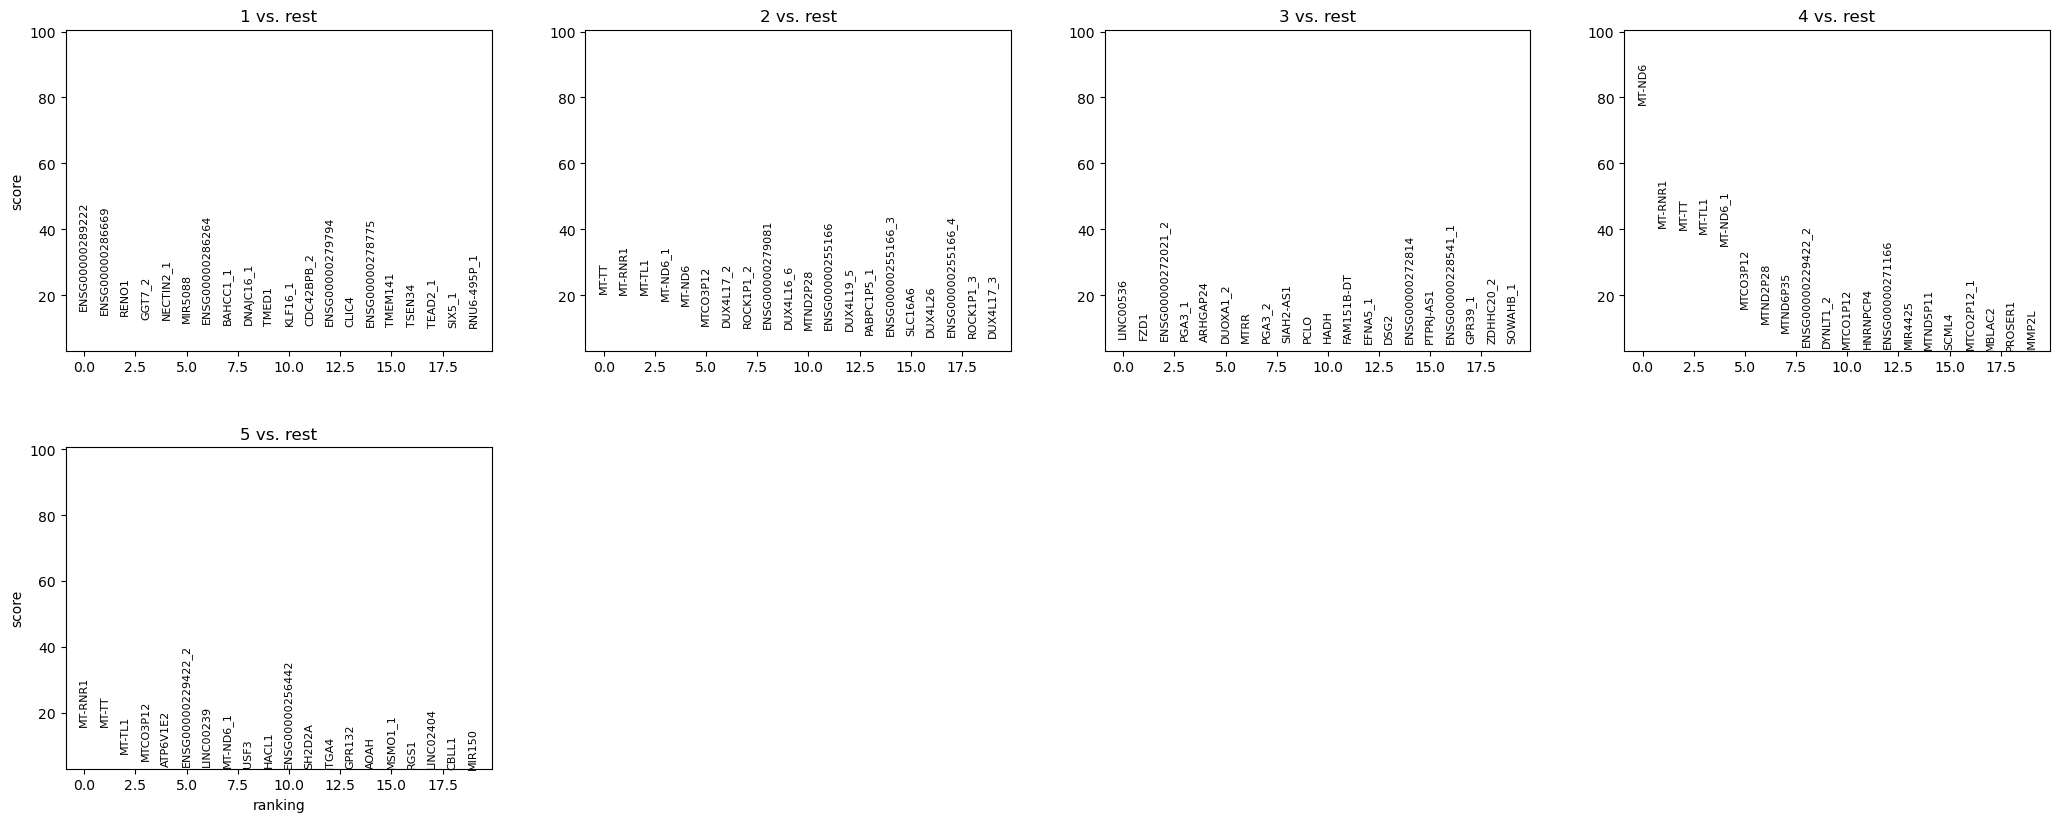

Plotting ranked genes groups for leiden with resolution: 0.2


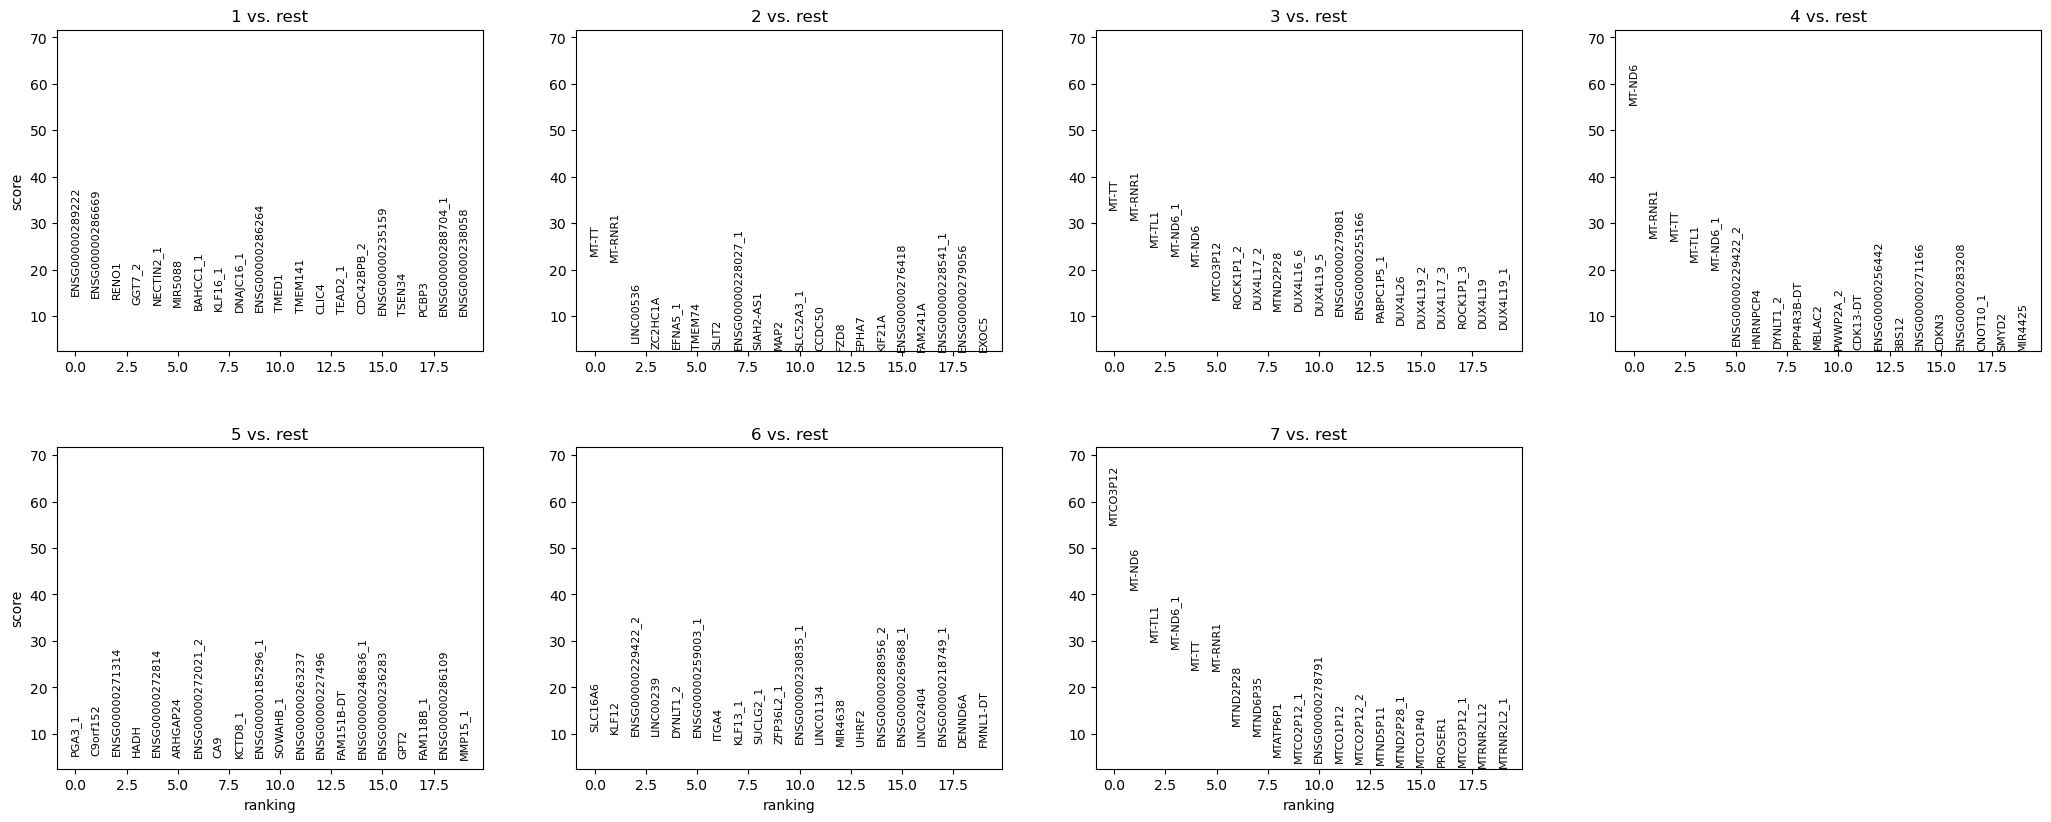

Plotting ranked genes groups for leiden with resolution: 0.3


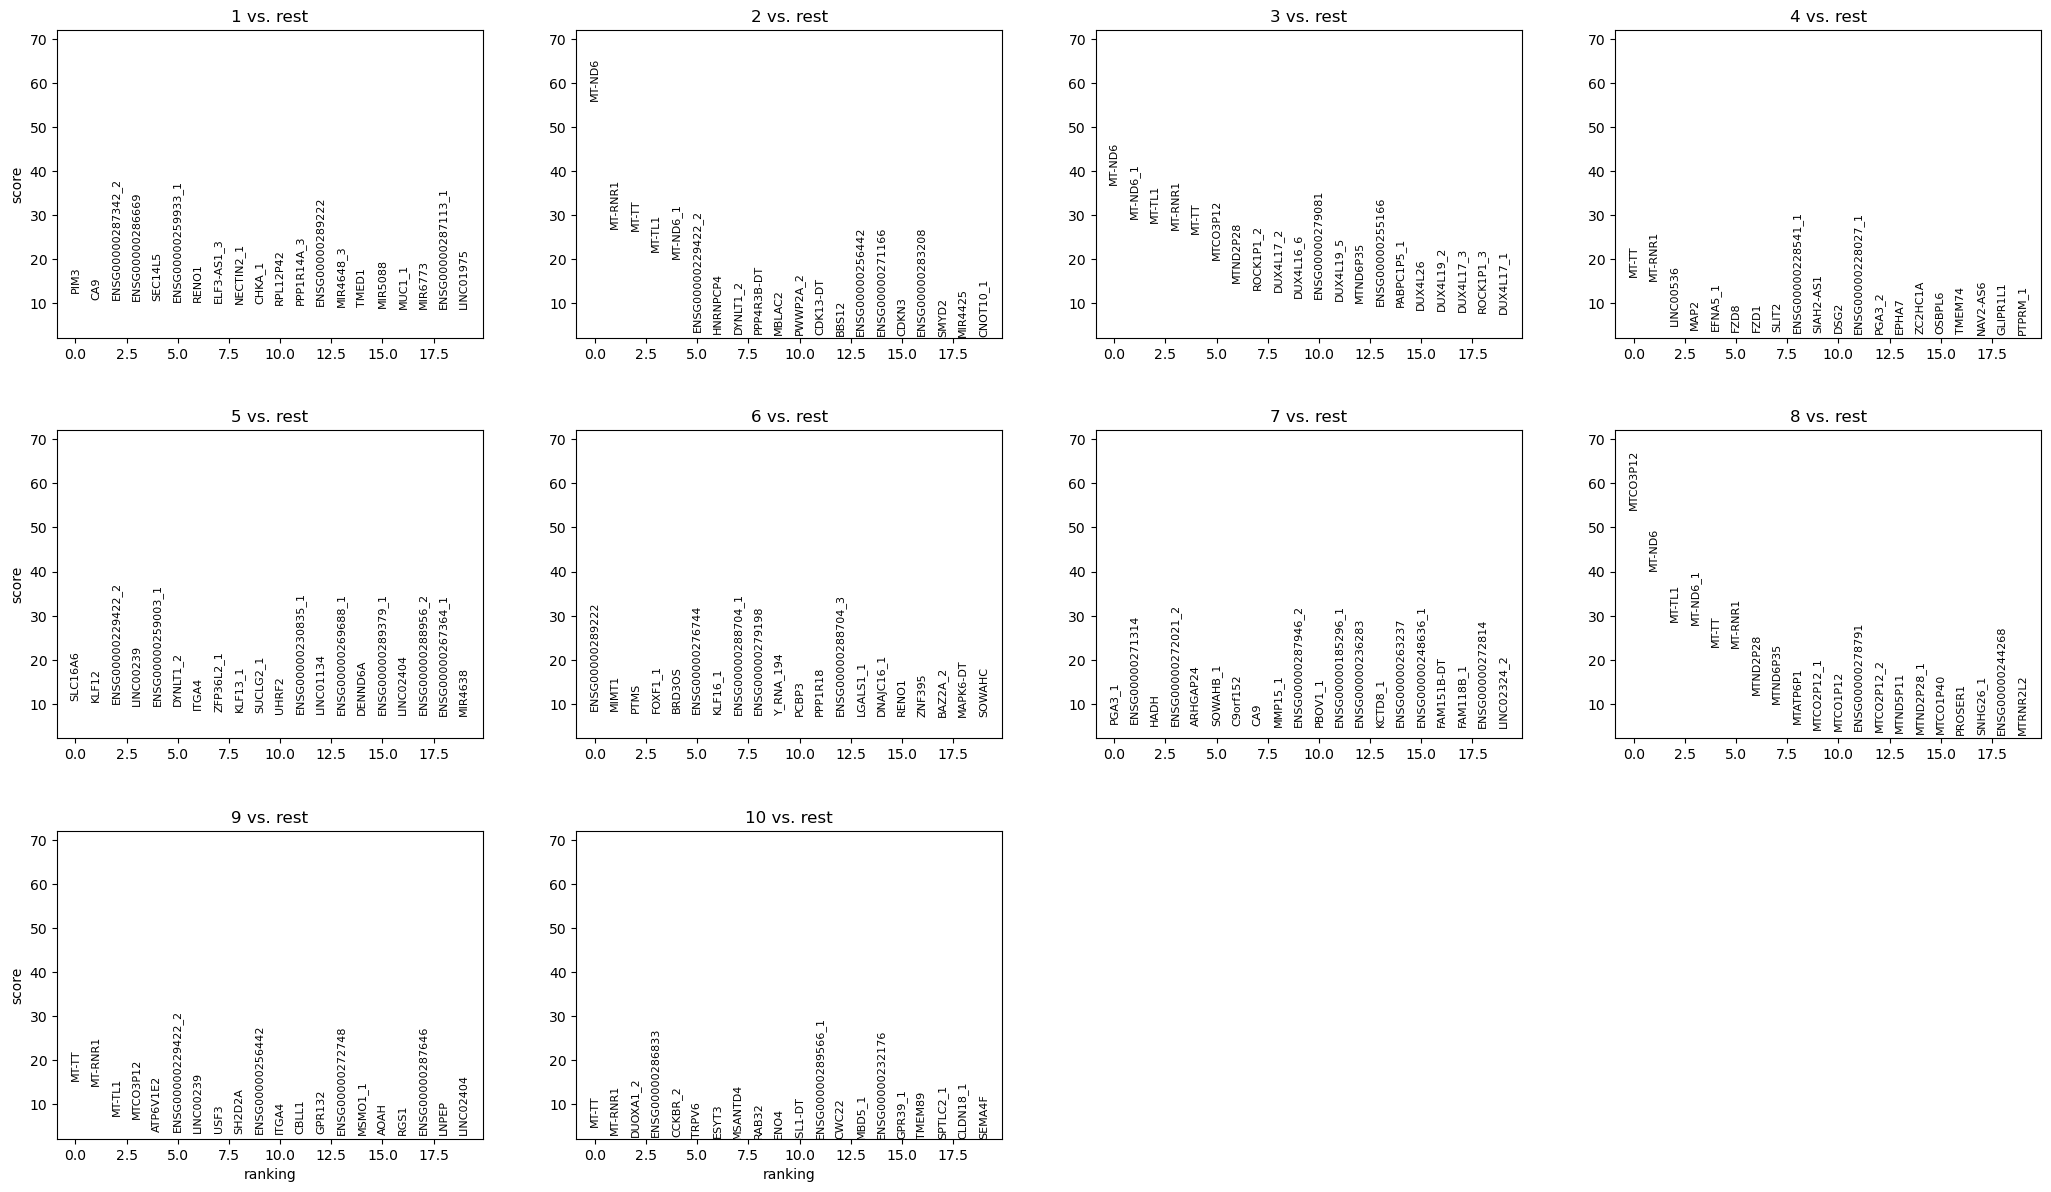

Plotting ranked genes groups for leiden with resolution: 0.4


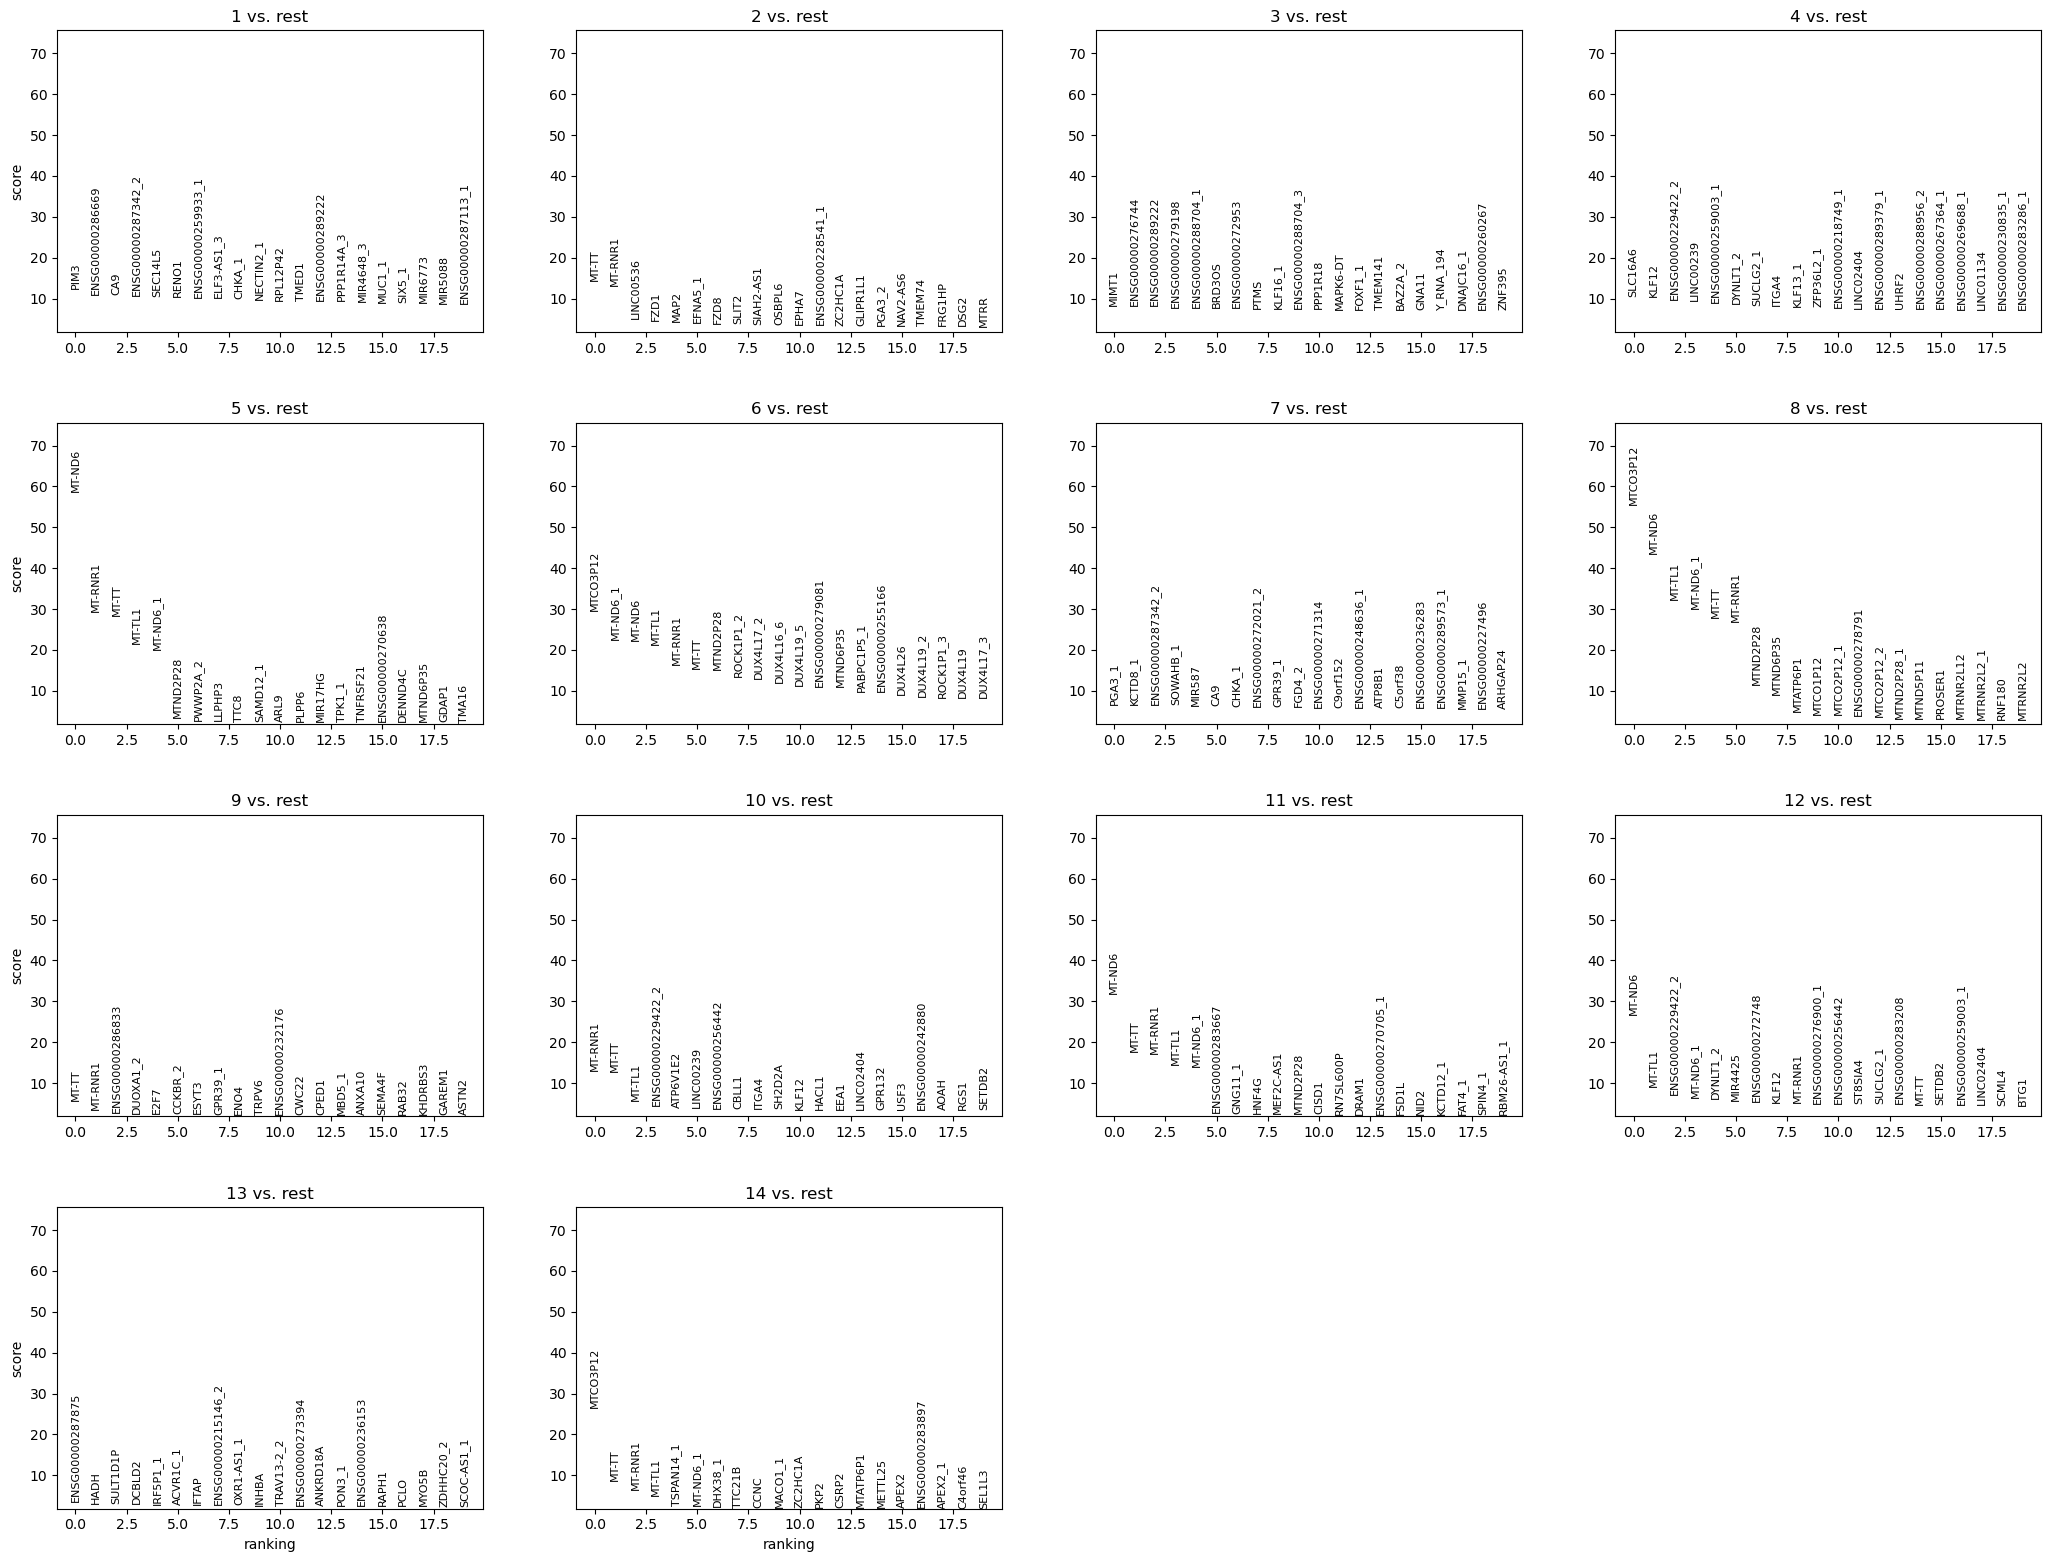

Plotting ranked genes groups for leiden with resolution: 0.5


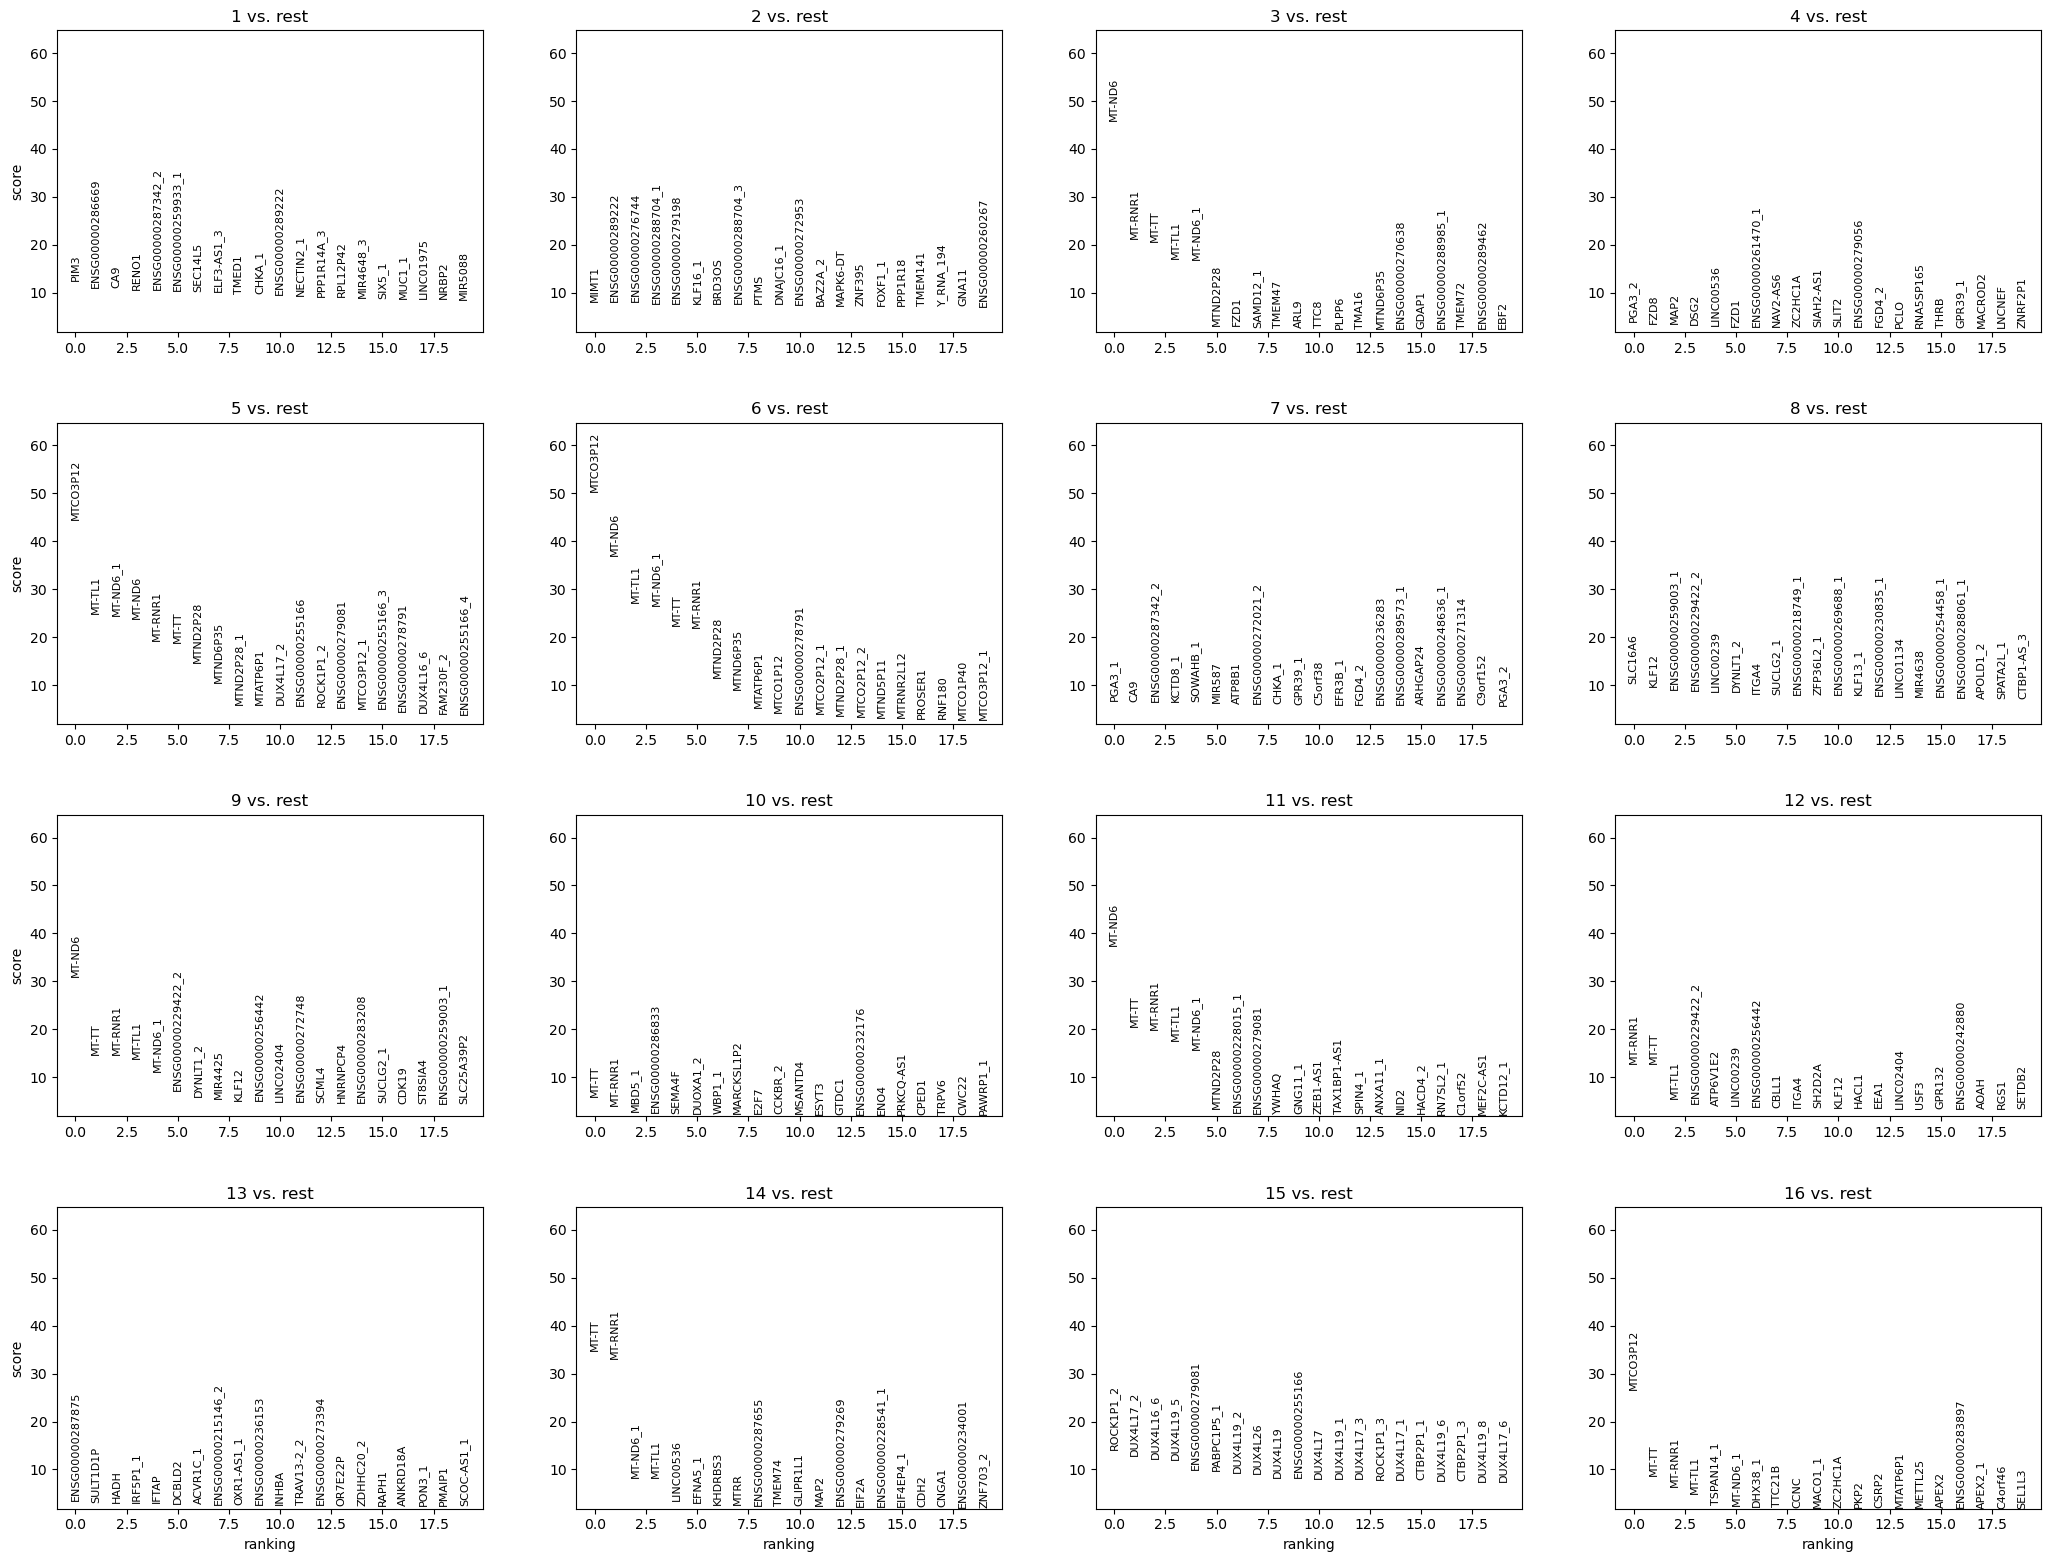

Plotting ranked genes groups for leiden with resolution: 0.6


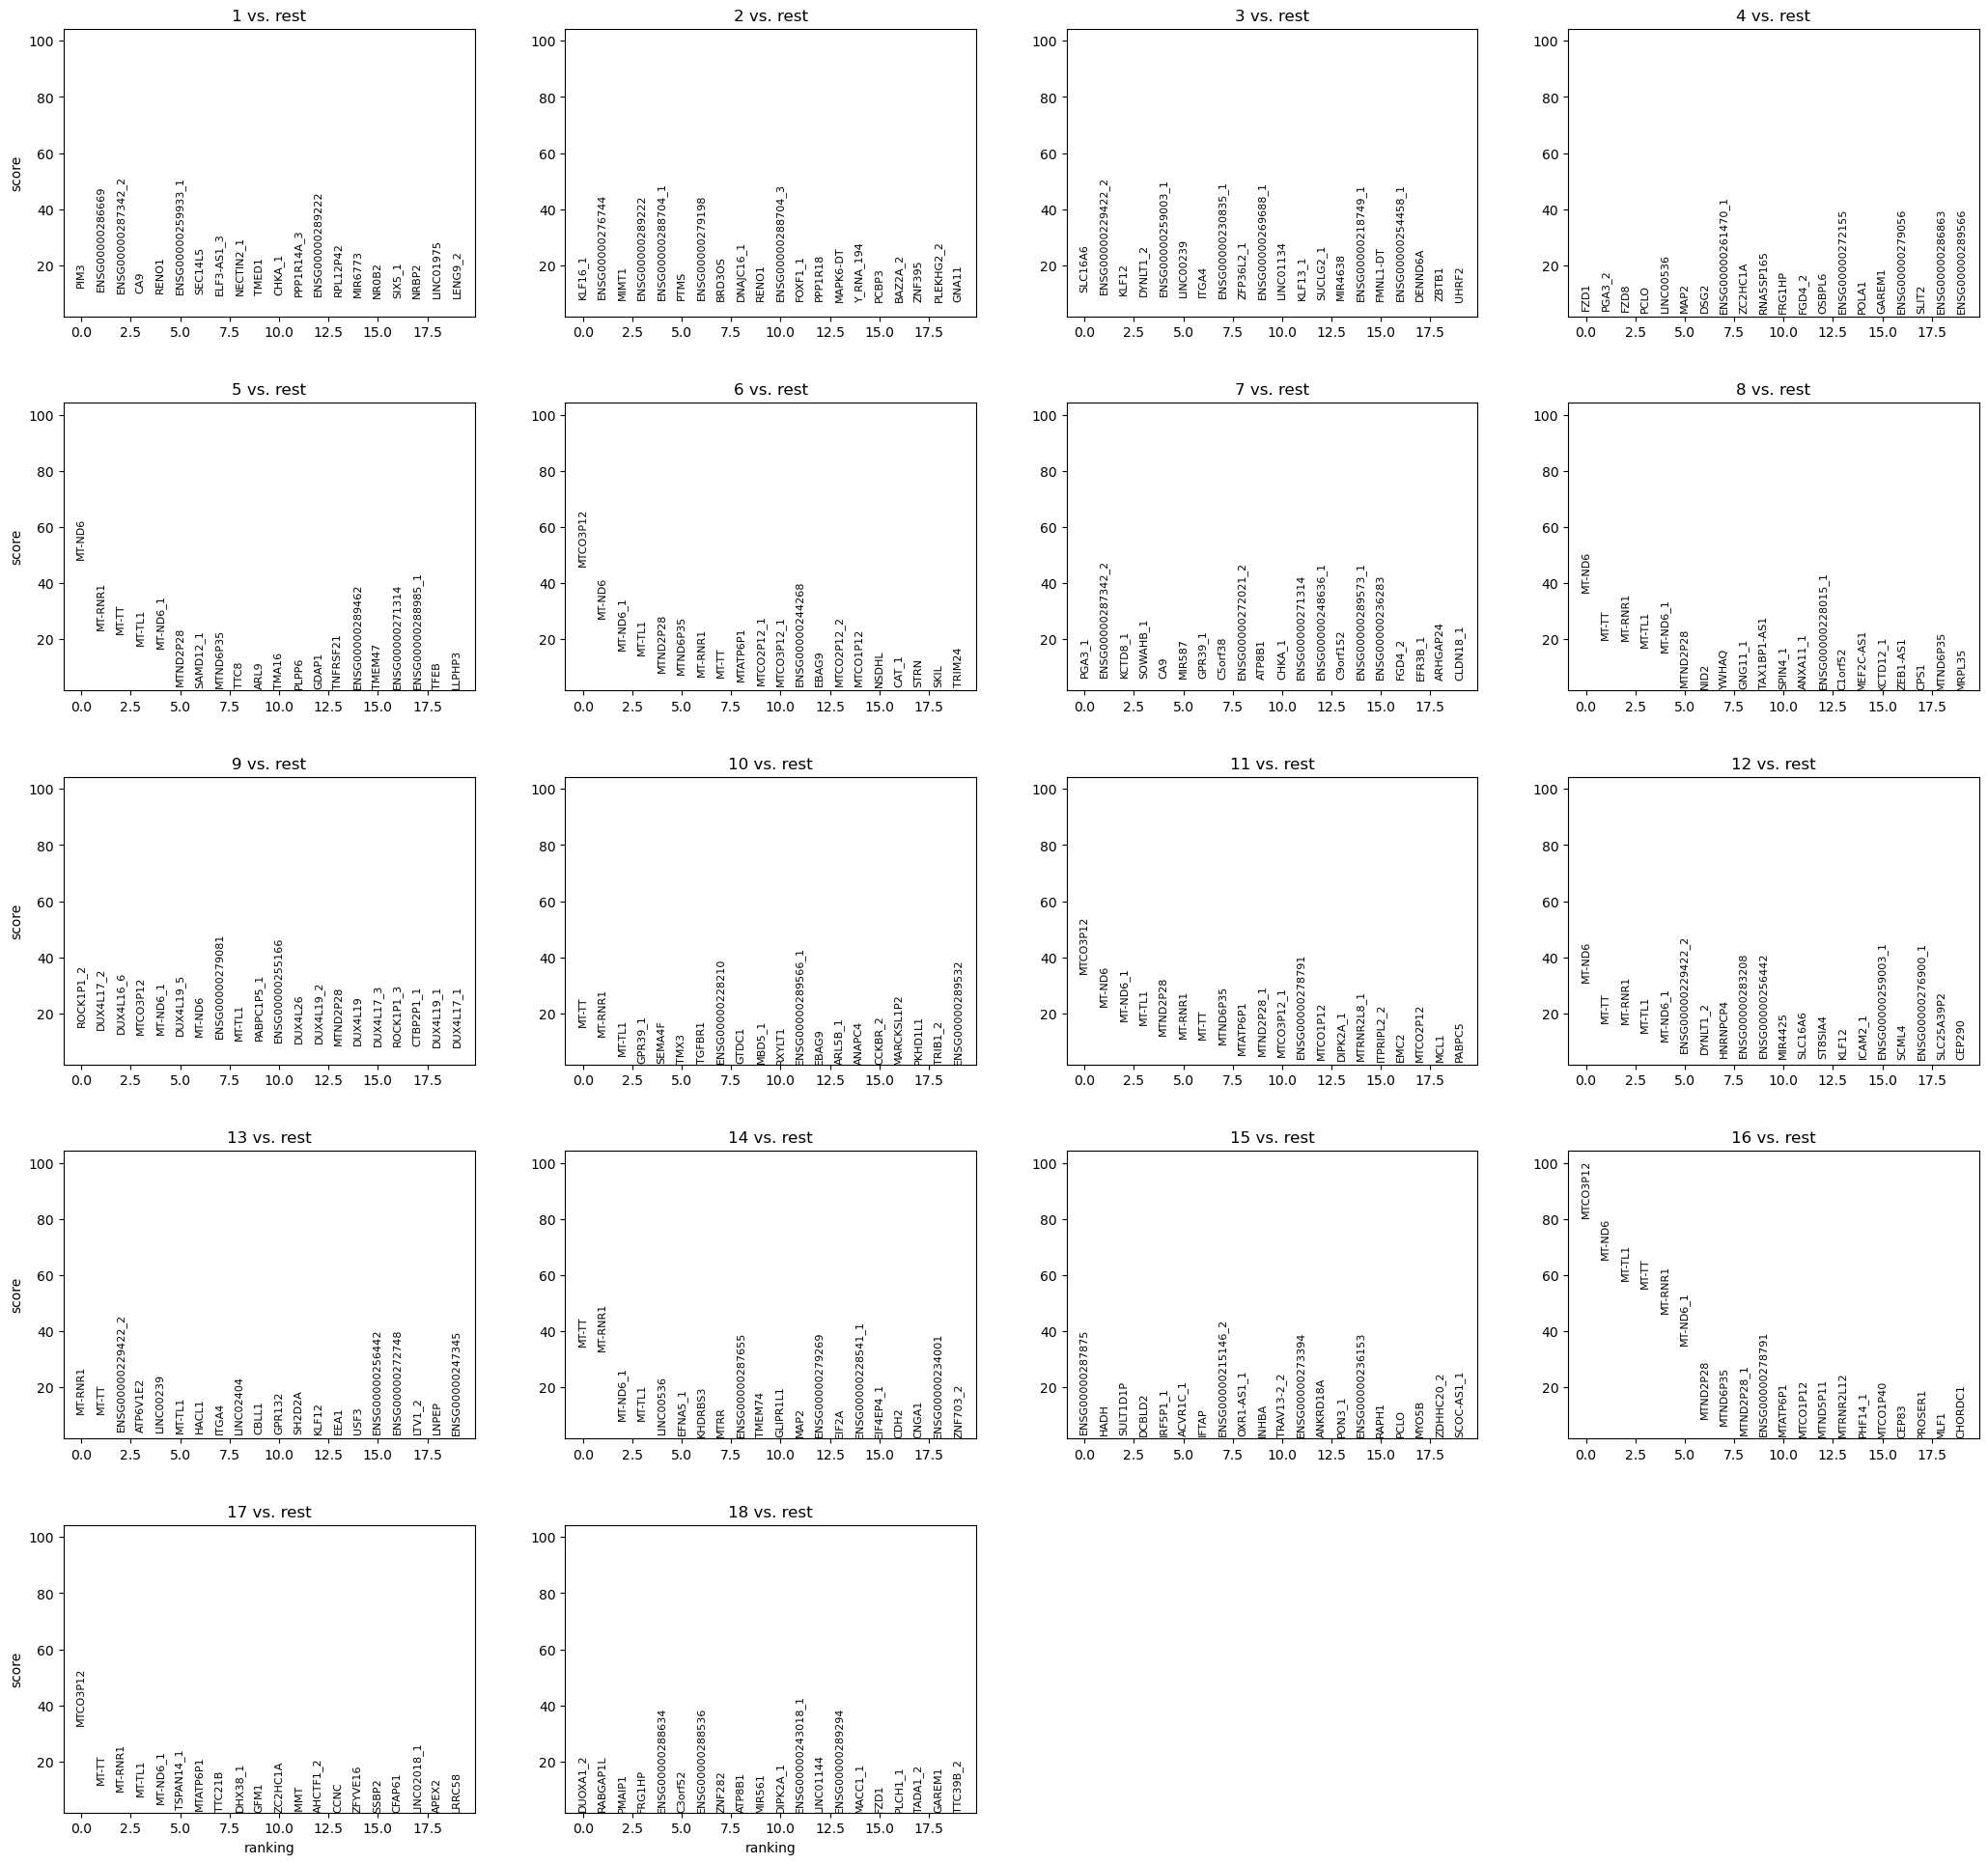

Plotting ranked genes groups for leiden with resolution: 0.7


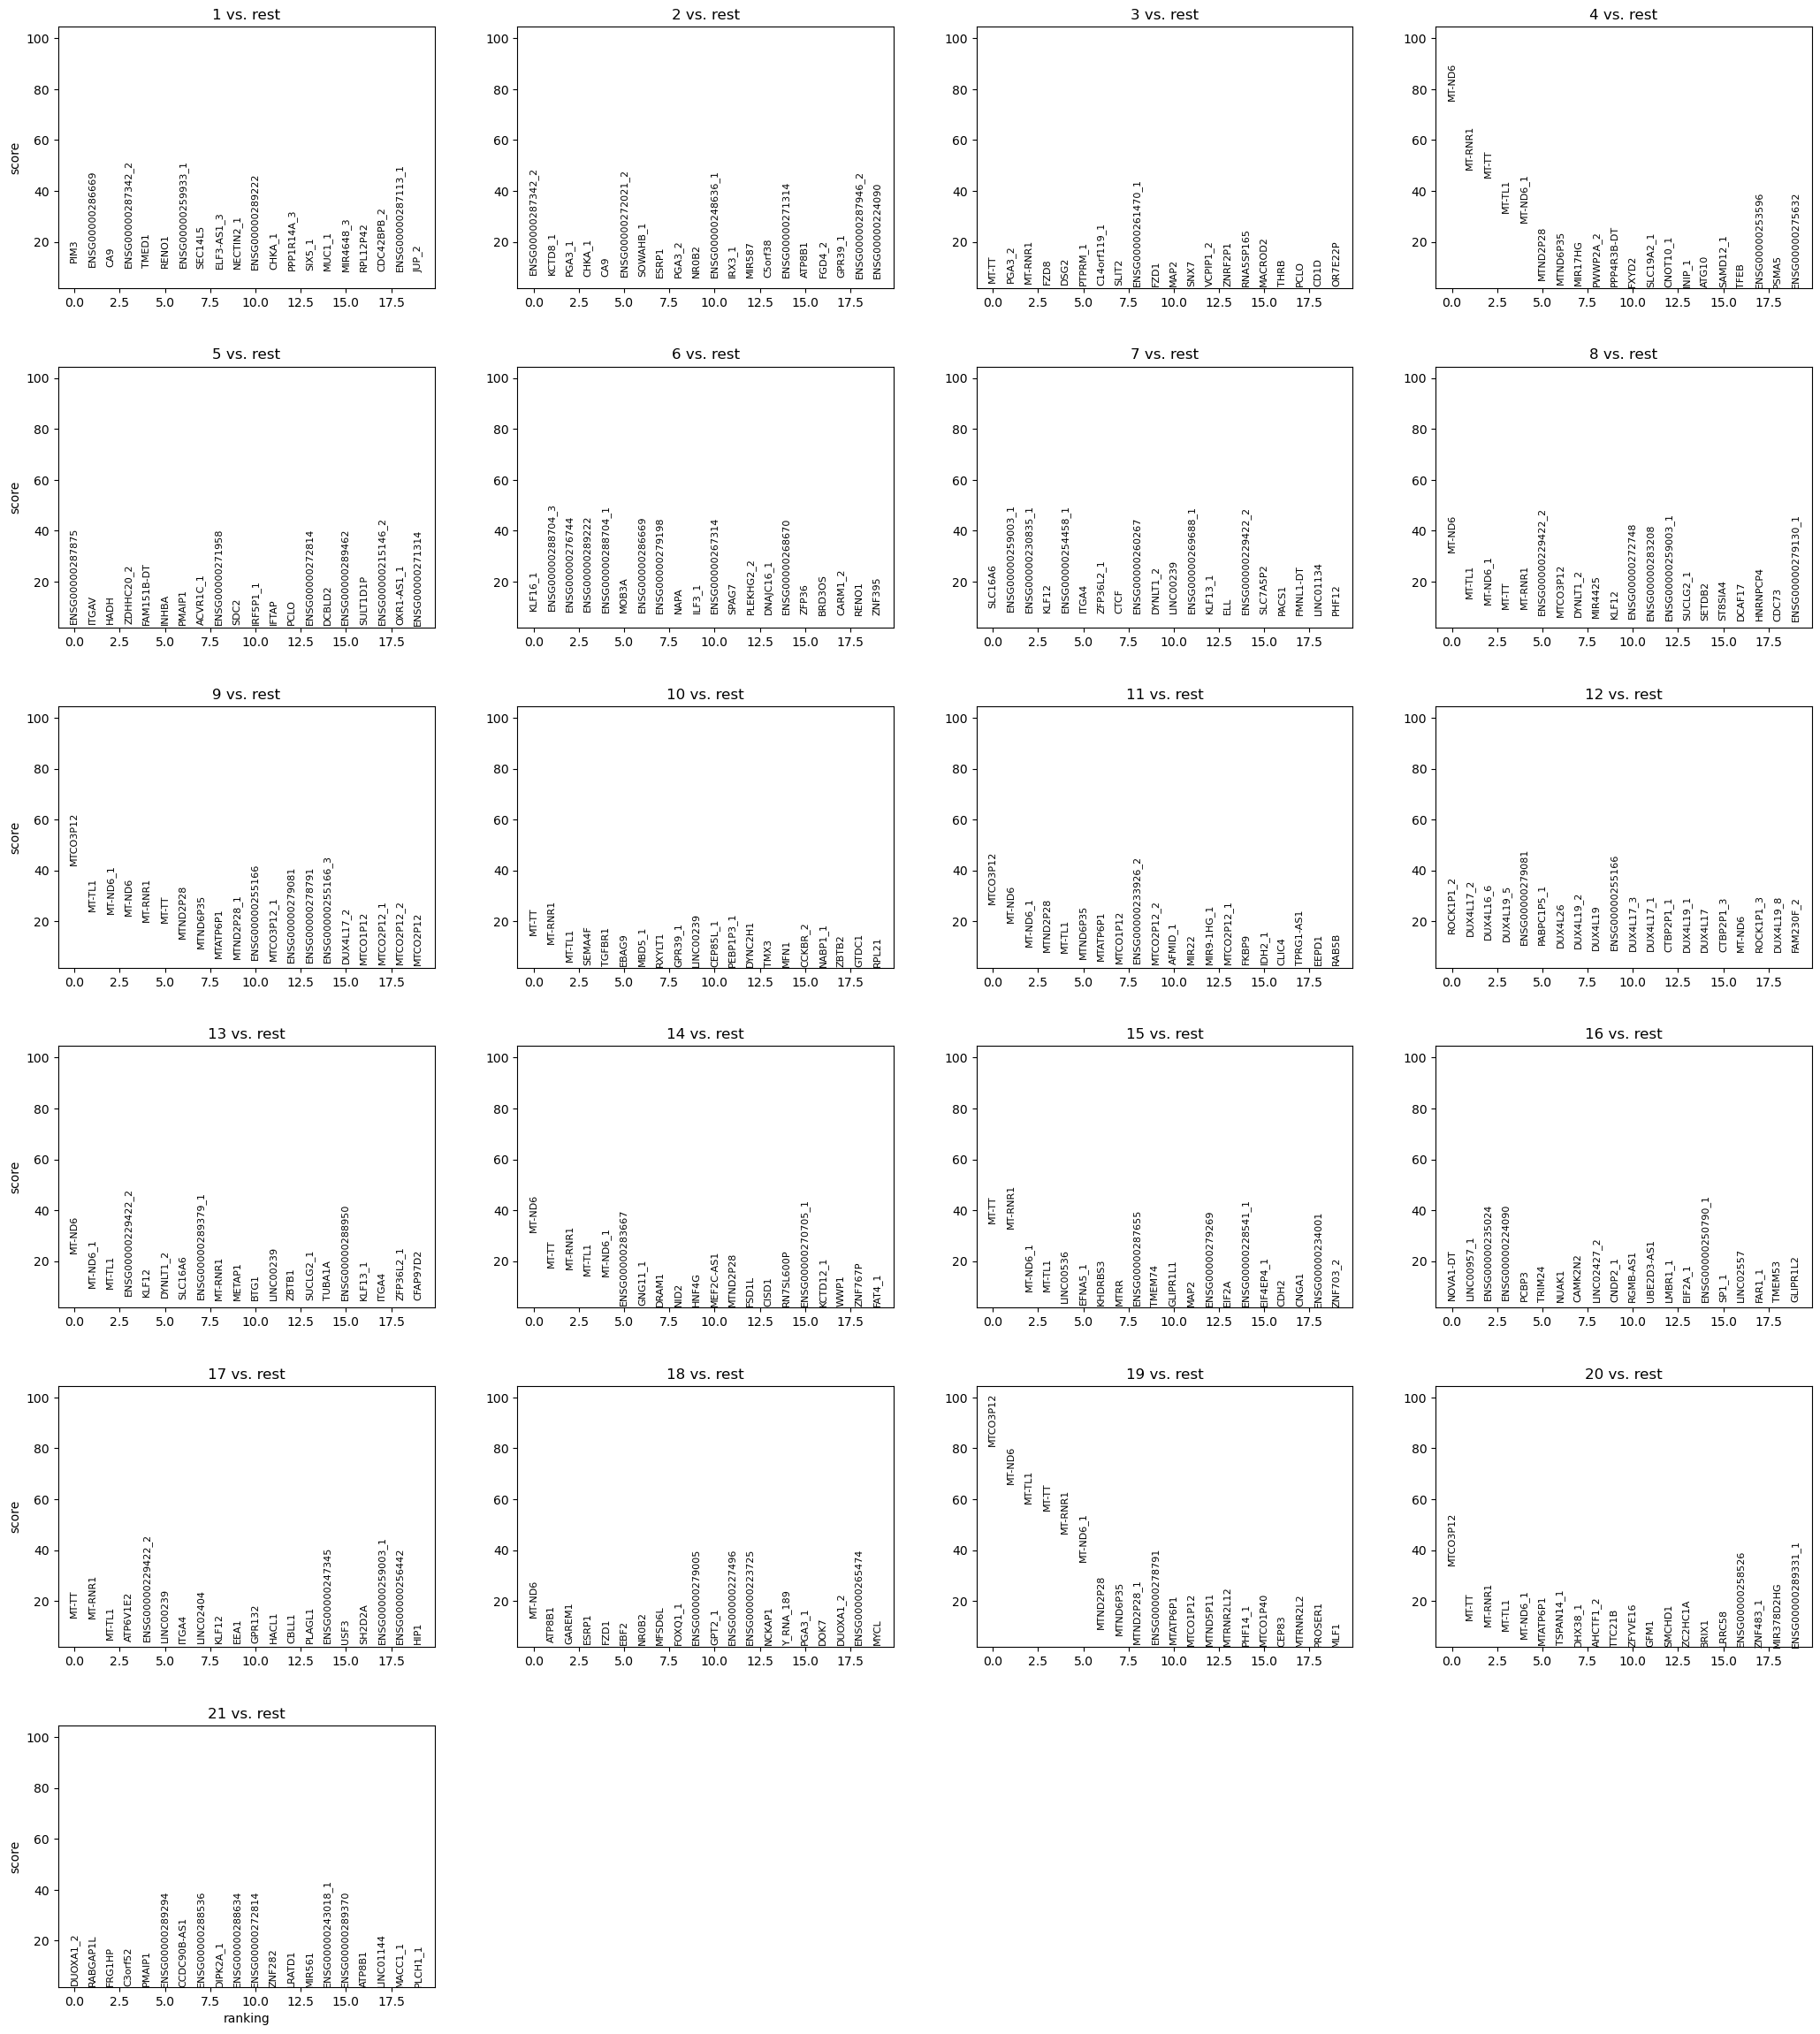

Plotting ranked genes groups for leiden with resolution: 0.8


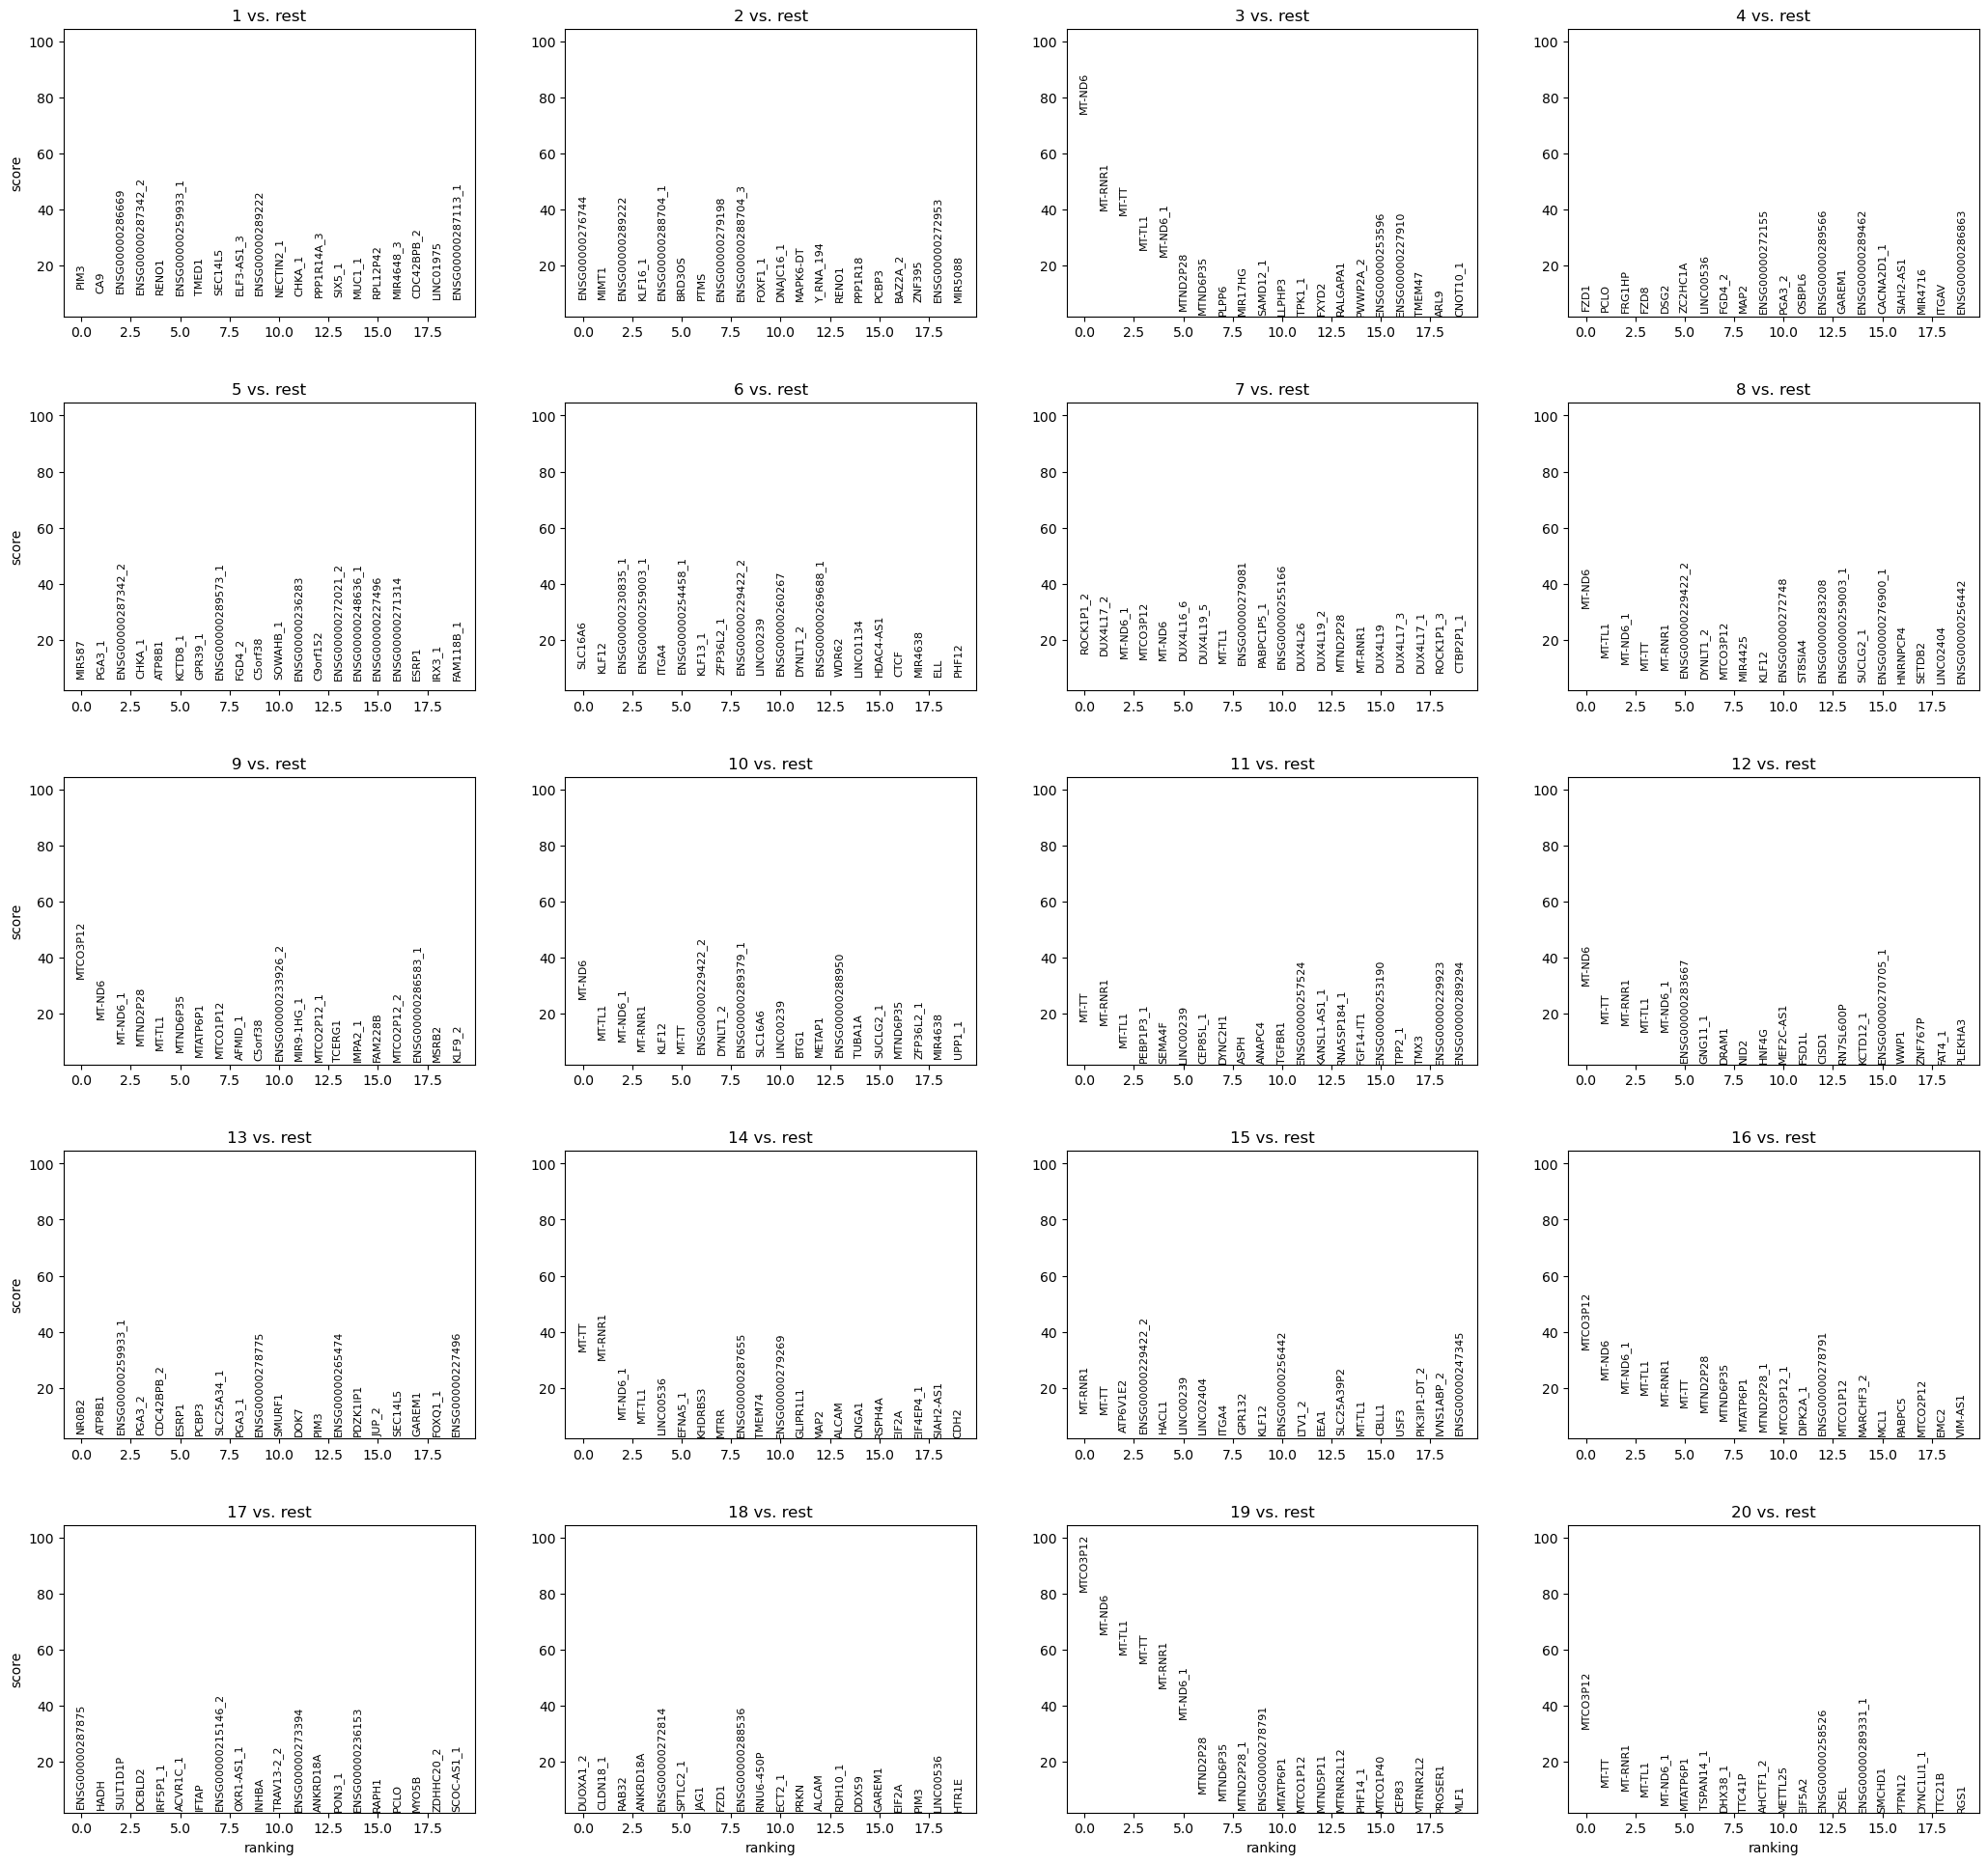

Plotting ranked genes groups for leiden with resolution: 0.9


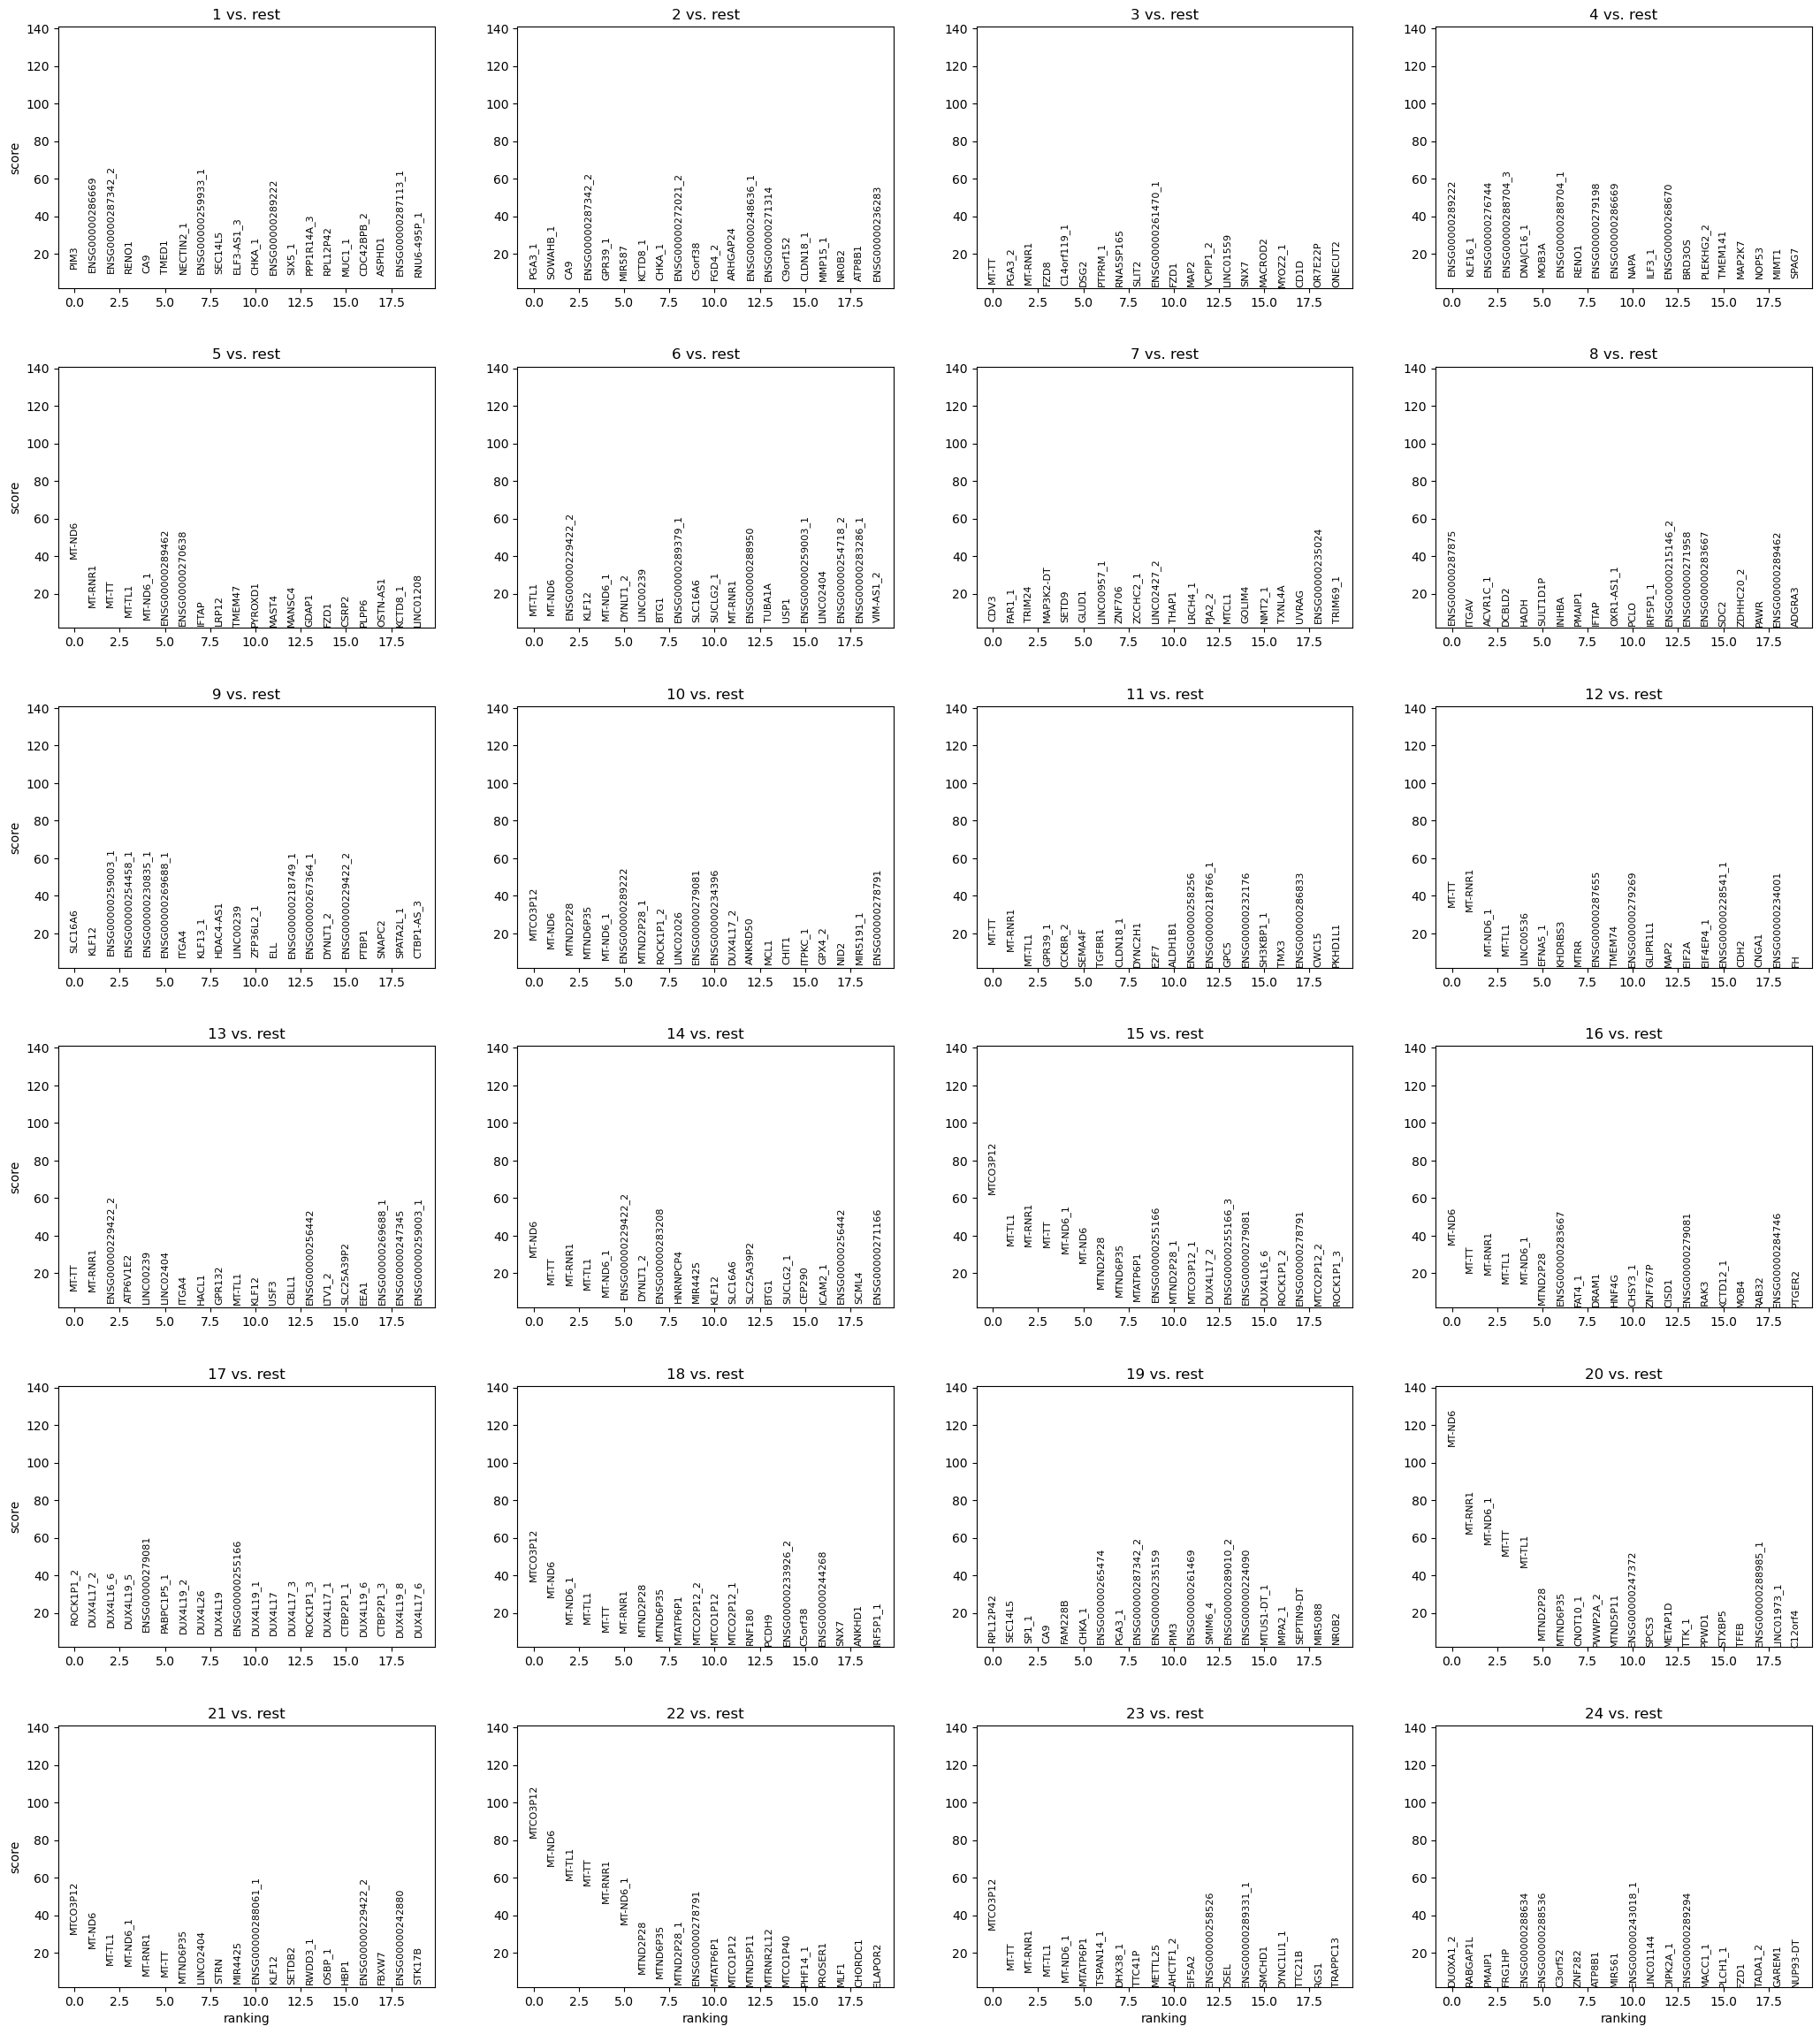

In [22]:
for res in resolutions:
    print(f'Plotting ranked genes groups for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups(genes_adata, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_leiden_{res}.png')
    plt.show()

Plotting matrixplot for leiden with resolution: 0.1


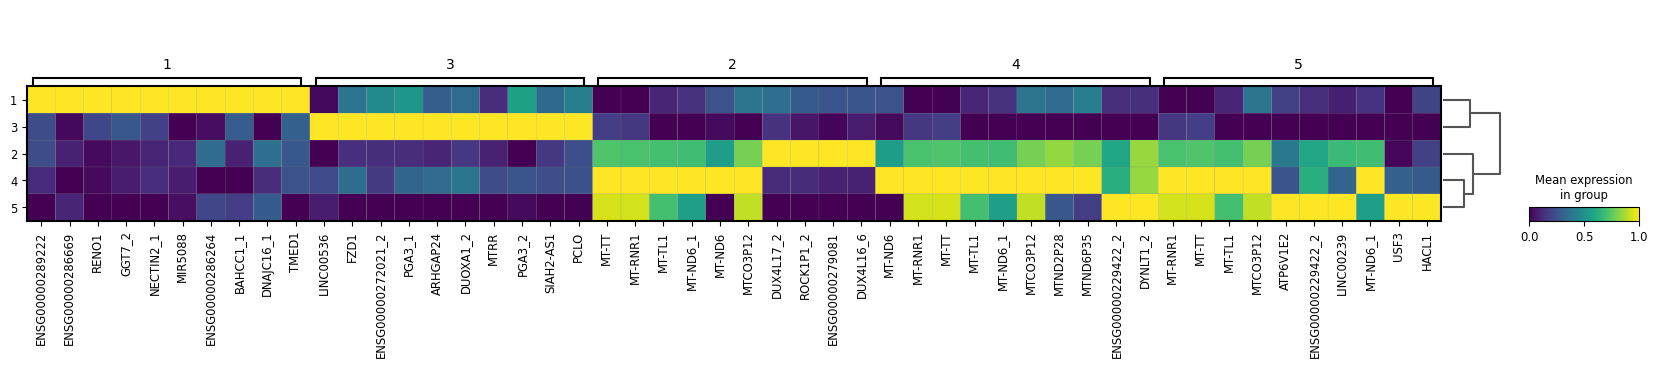

Plotting matrixplot for leiden with resolution: 0.2


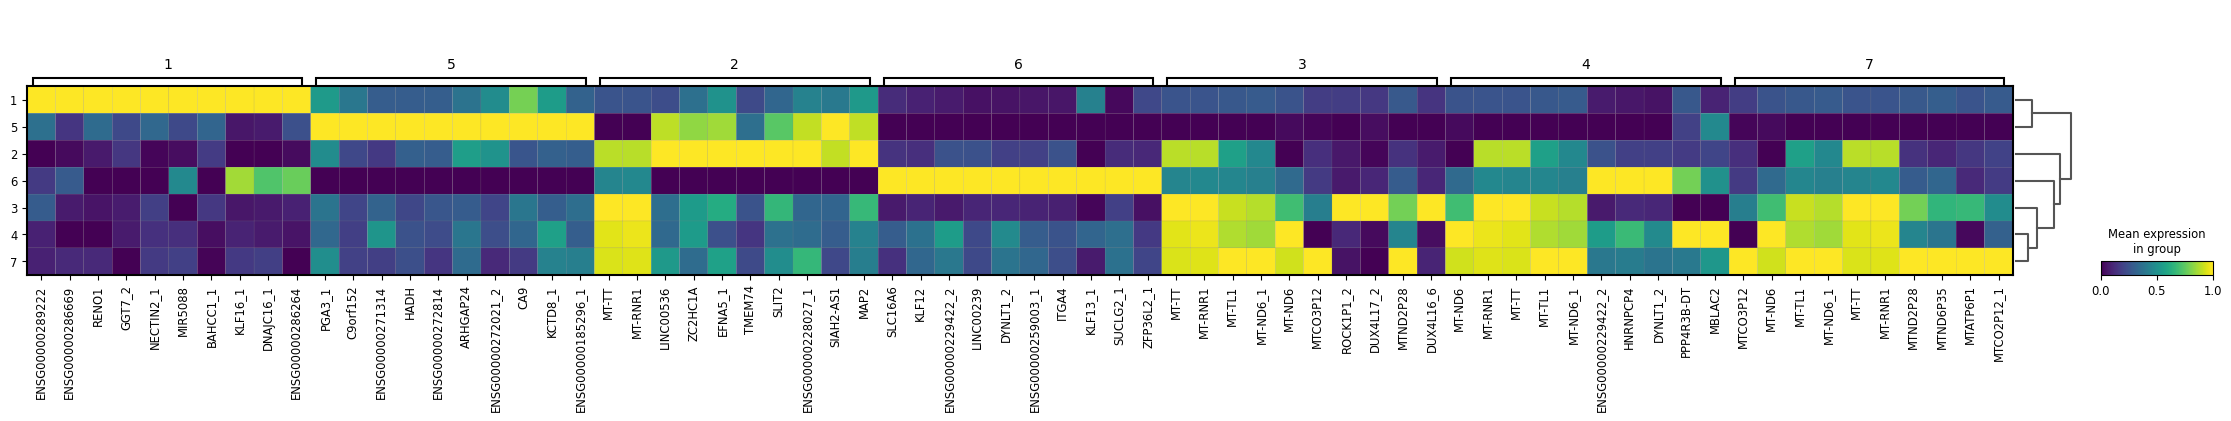

Plotting matrixplot for leiden with resolution: 0.3


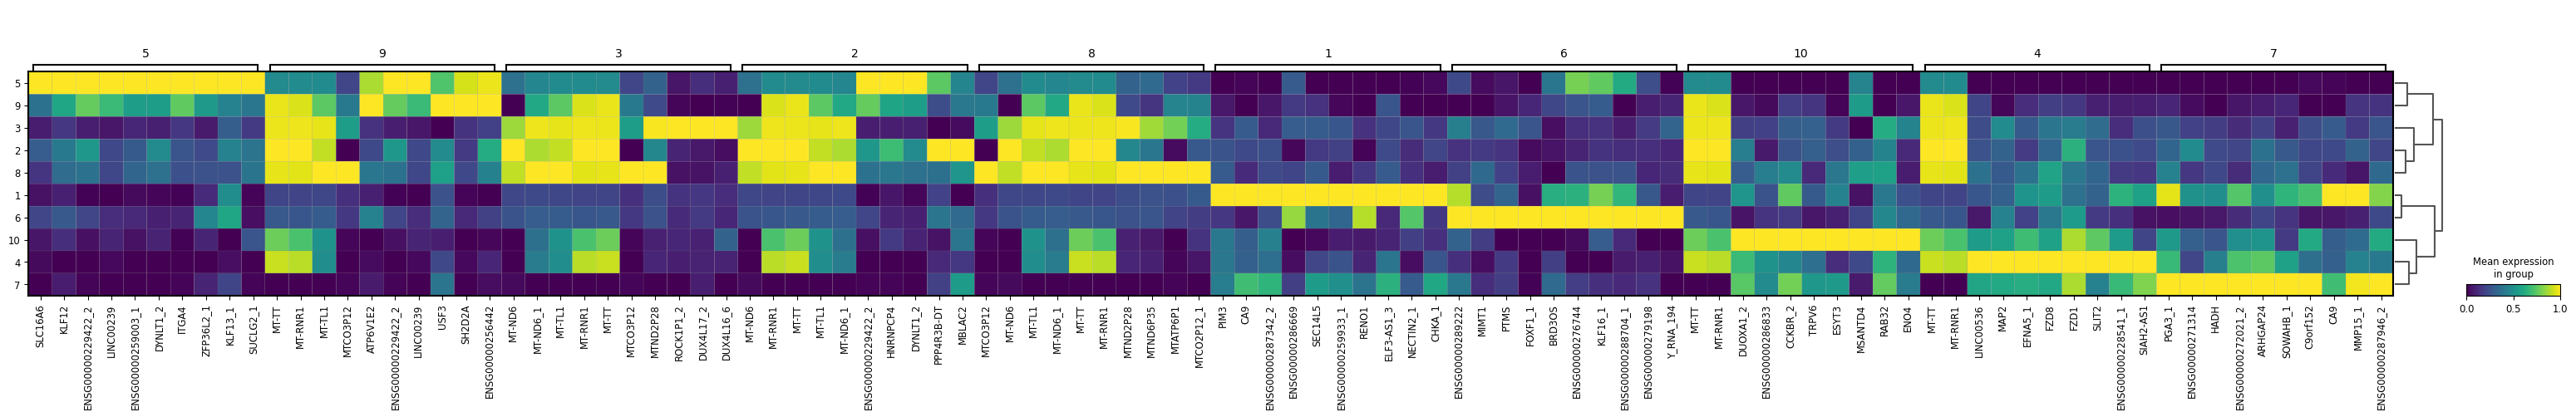

Plotting matrixplot for leiden with resolution: 0.4


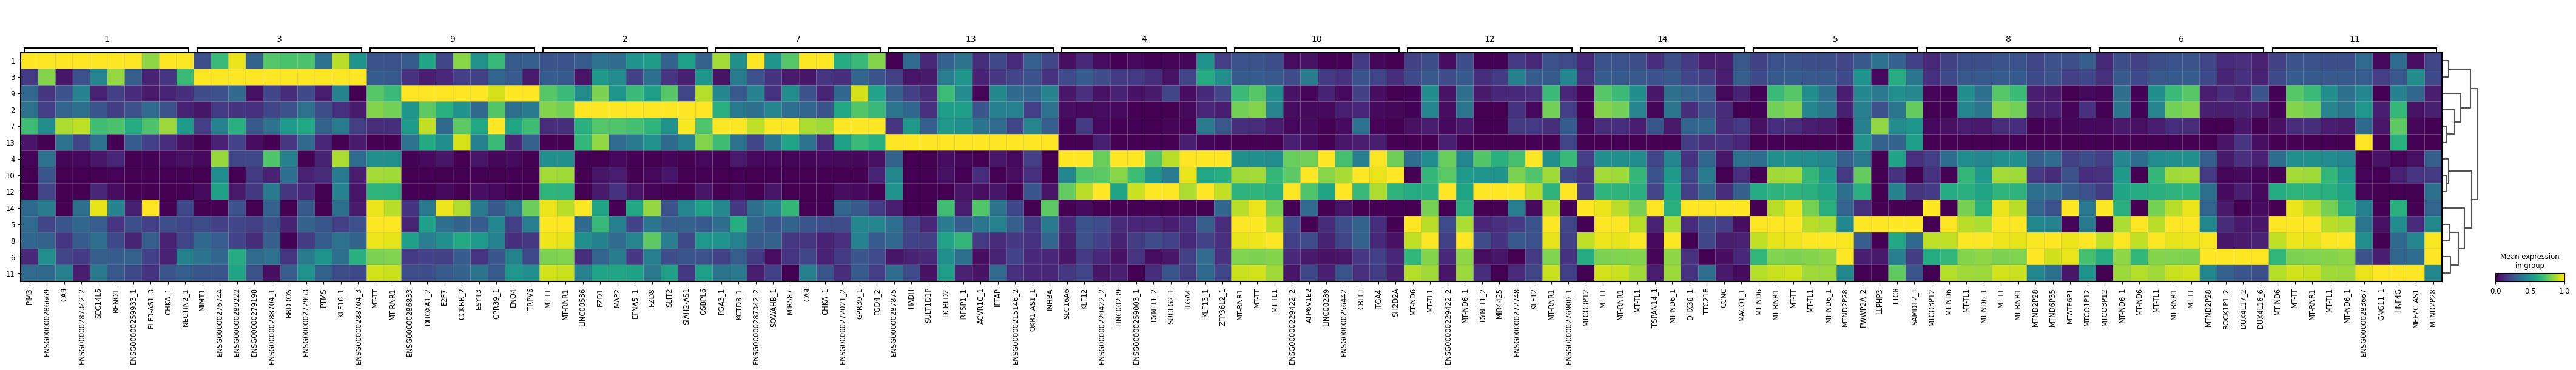

Plotting matrixplot for leiden with resolution: 0.5


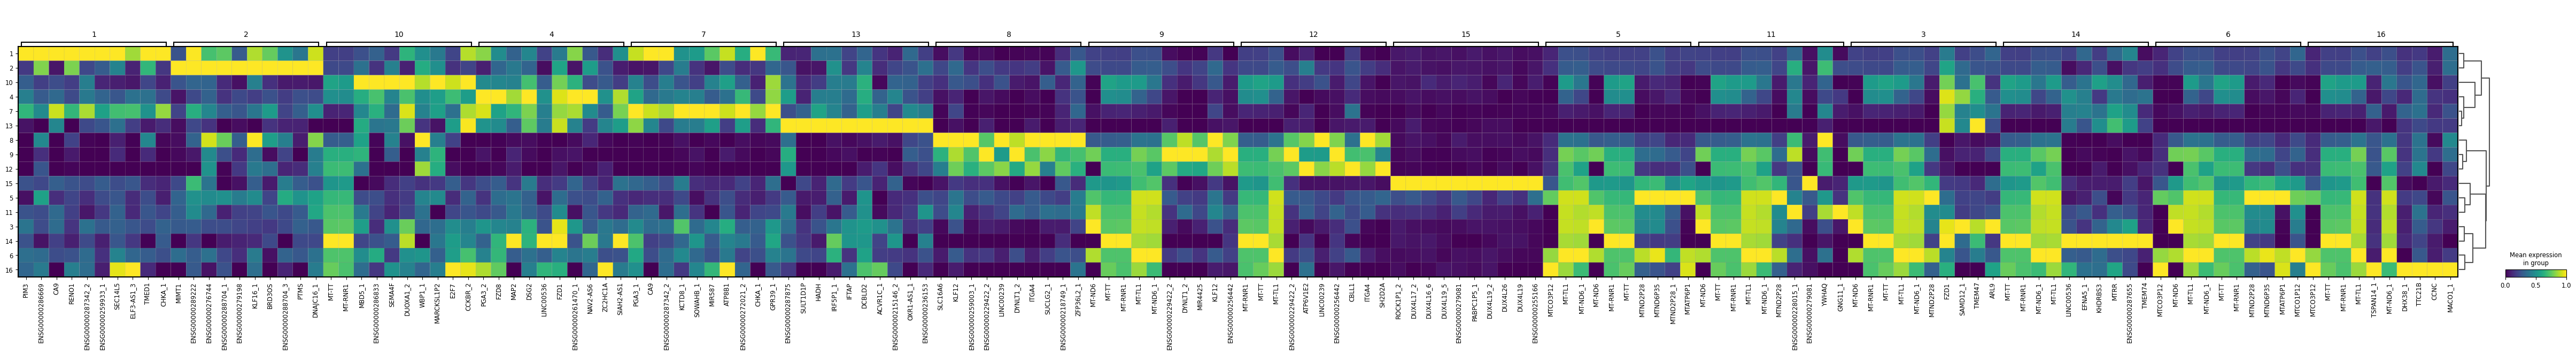

Plotting matrixplot for leiden with resolution: 0.6


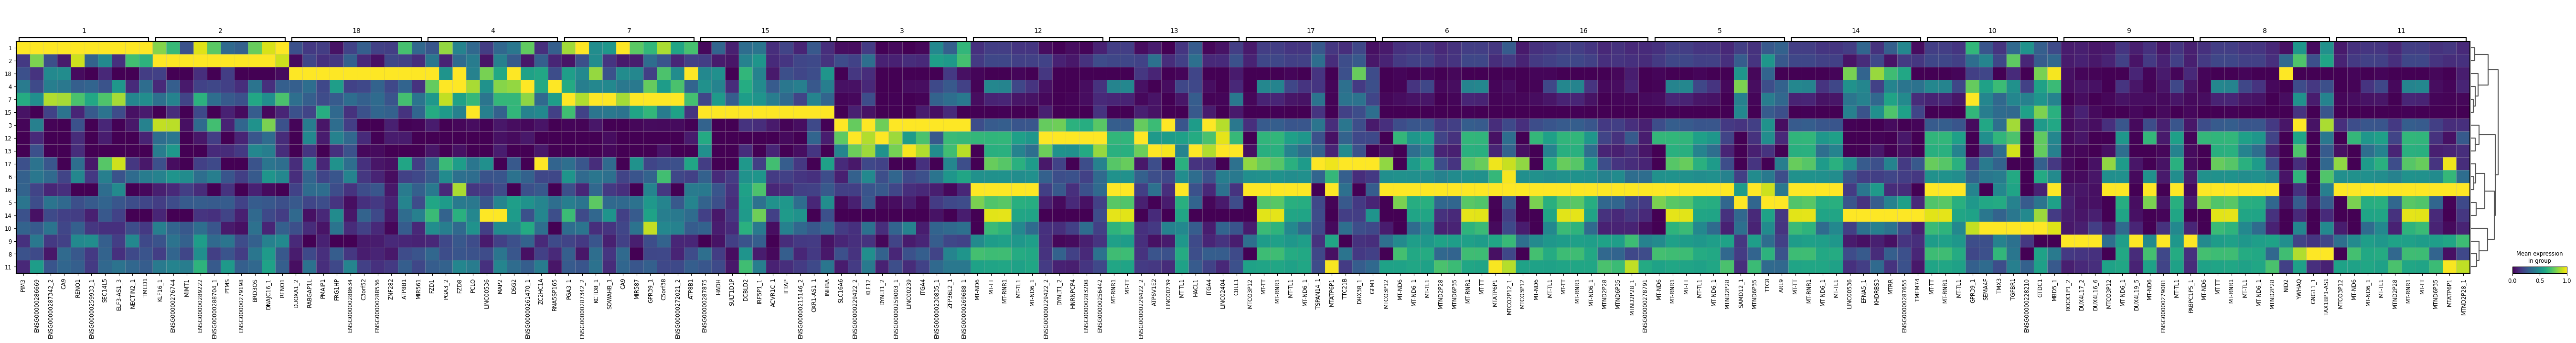

Plotting matrixplot for leiden with resolution: 0.7


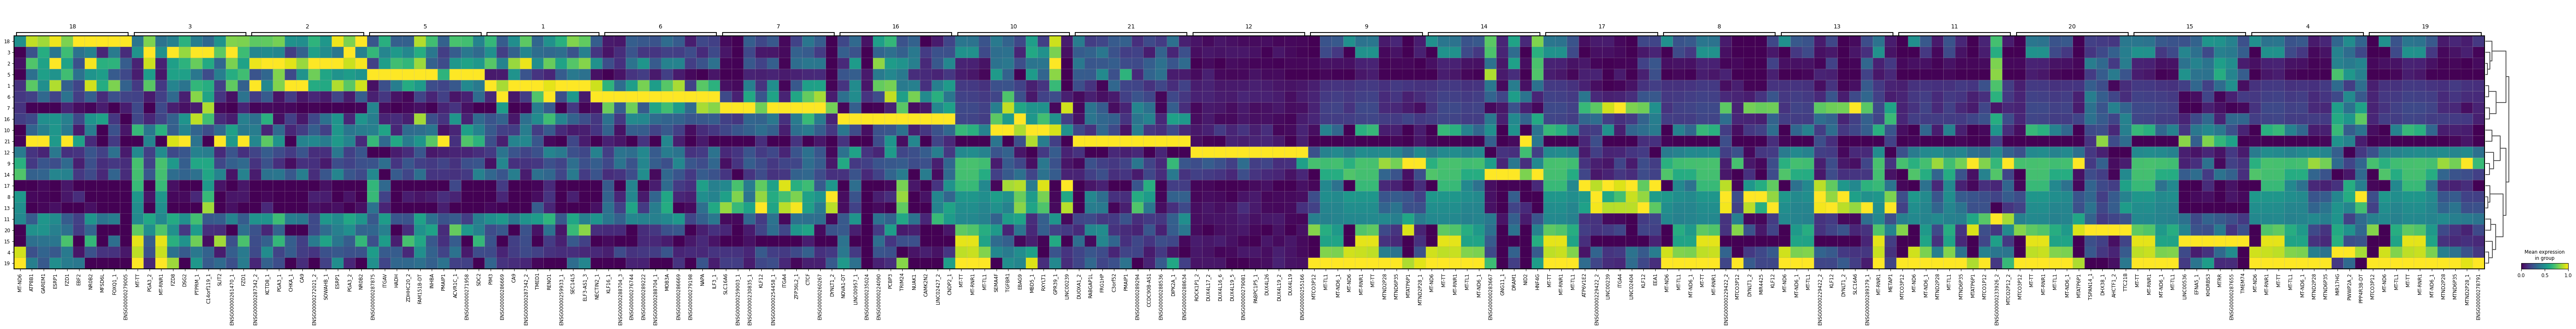

Plotting matrixplot for leiden with resolution: 0.8


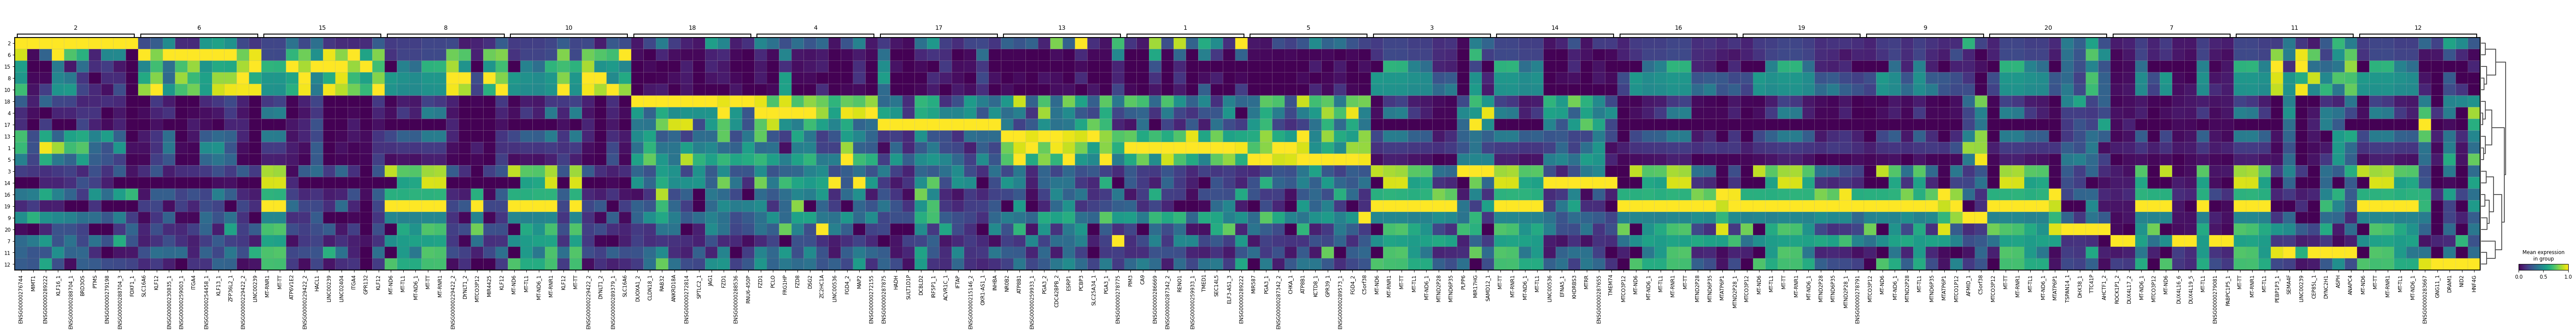

Plotting matrixplot for leiden with resolution: 0.9


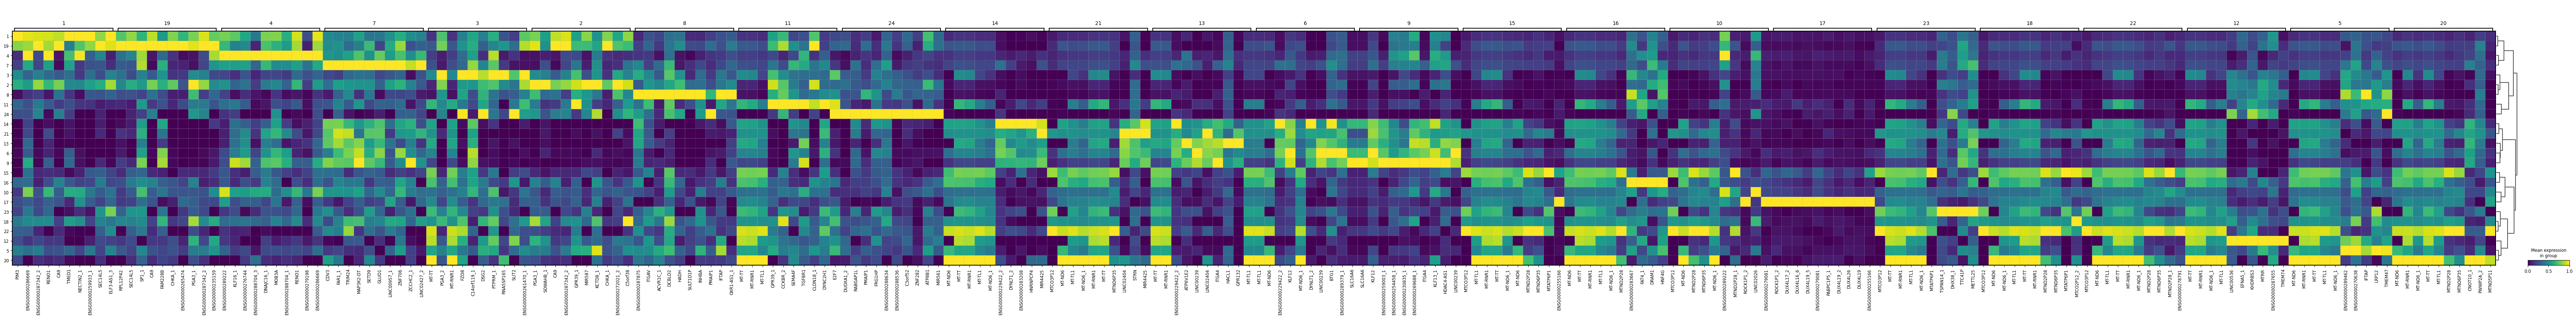

In [23]:
for res in resolutions:
    print(f'Plotting matrixplot for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups_matrixplot(genes_adata, standard_scale='var', n_genes=10, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_matrixplot_leiden_{res}.png')
    plt.show()

In [ ]:
for res in resolutions:
    ctannot.annot_ct(adata=adata, genes_adata=genes_adata, output_path=tree.annotation_dir, db_path=f"{PANGLAO_DB_PATH}", cluster_path=None, cluster_column=f"leiden_{res}", rank_genes_column=f"rank_genes_groups_{res}", sample=tree.run, ct_column=f"cell_types_{res}", tissue="all", db="panglao", inplace=True)

Output folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/leiden_0.1/ 
DB file: /mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers 
Cluster folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/ranked/clusters/leiden_0.1/ 
Tissue: all 
DB: panglao
Created folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/ranked/clusters/leiden_0.1
Created folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/ranked/output/leiden_0.1
Writing one file per cluster containing gene names and ranked gene scores.
Starting cell type annotation.
Adding information to the adata object.
Finished cell type annotation! The results are found in the .obs table cell_types_0.1.
Output folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/leiden_0.2/ 
DB file: /mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers 
Cluster folder: /mnt/workspace/jdetlef/processed_data/Stomach_95/annotation/ranked/clusters/leiden_0.2/ 
Ti

In [ ]:
for res in resolutions:
    sc.pl.umap(adata, color=[f'cell_types_{res}', f'leiden_{res}'], wspace=0.5)

## Modify wrong cluster annotations by selecting other recommendations

In [60]:
ctannot.modify_ct(adata=adata, resolutions=resolutions, annotation_dir=tree.annotation_dir, clustering_column="leiden", cell_type_column="cell_types", inplace=True)

Enter cluster resolution: 0.2


KeyboardInterrupt: Interrupted by user

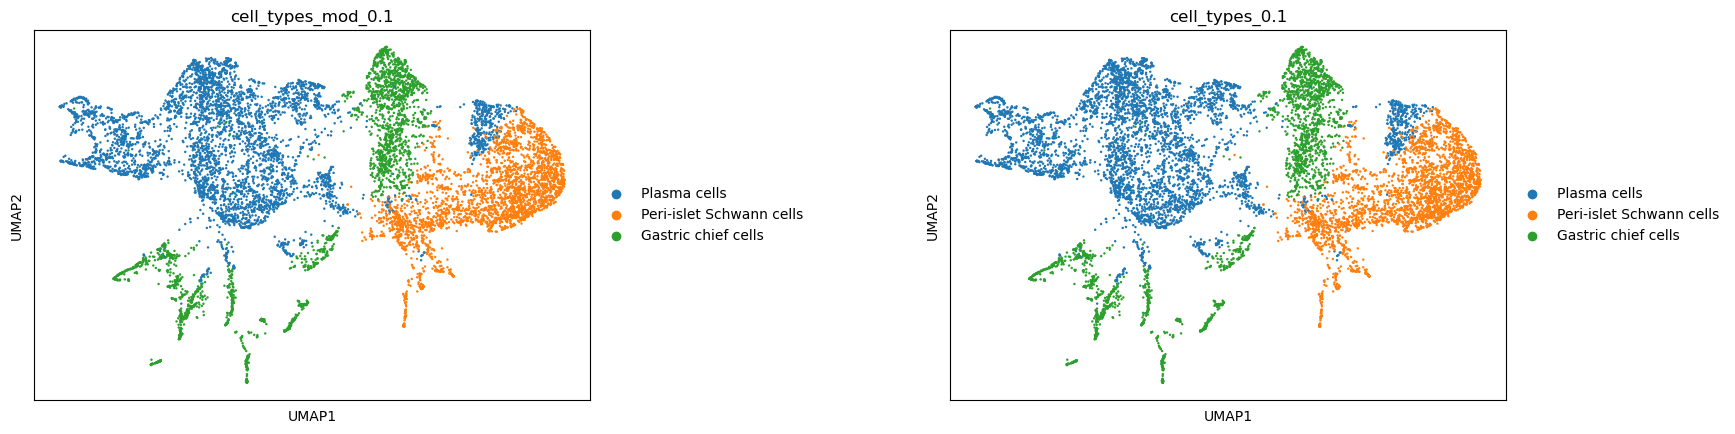

In [61]:
sc.pl.umap(adata, color=[f'cell_types_mod_0.1', f'cell_types_0.1'], wspace=0.5)